# Проект. Исследование стартапов

Орлов Михаил Евгеньевич     
03.10.2025

## Введение

Данный проект выполнен для финансовой компании, специализирующейся на венчурных инвестициях, с целью анализа закономерностей финансирования стартапов и оценки перспектив выхода на рынок с покупкой и развитием компаний. Исследование основано на исторических данных о 54,294 компаниях, включая информацию об объемах привлеченных инвестиций, типах финансирования и статистике возвратов средств за период с 1999 по 2014 год.

**Цель проекта** - подготовка датасета к работе, исследование динамики и структуры финансирования стартапов, а также формирование ответов на ключевые вопросы для оценки инвестиционных стратегий. В рамках проекта решаются следующие задачи: предобработка данных и проверка их корректности, выделение групп компаний по срокам финансирования, классификация сегментов рынка, идентификация аномальных значений, сравнение типов финансирования, анализ динамики инвестиций и оценка возвратности средств.

Актуальность исследования обусловлена необходимостью разработки научно обоснованного подхода к инвестированию в стартапы в условиях высокой неопределенности и рисков венчурного рынка. Полученные результаты позволят компании оптимизировать инвестиционную стратегию и повысить эффективность капиталовложений.

Методология исследования включает комплексный анализ данных с применением статистических методов, методов машинного обучения для обработки аномалий и анализа временных рядов. Особое внимание уделено обеспечению достоверности результатов через тщательную валидацию данных на каждом этапе исследования.


## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

Файлы находятся в папке `datasets`, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации

Загрузите необходимые для работы библиотеки.

Совет: если вы неоднократно используете какой-либо код, вынесите его в начало проекта в виде функций.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

Загрузите все данные по проекту.

Совет: данные из zip-архива можно загрузить следующим кодом:

`df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)`

In [2]:
# Загрузка основного датасета из zip-архива
df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)
print("Основной датасет загружен. Форма:", df.shape)

Основной датасет загружен. Форма: (54294, 40)


Основной датасет успешно загружен. Он содержит 54294 строк и 40 колонок. Это данные о компаниях и их финансировании.

In [3]:
# Загрузка датасета с возвратами из папки datasets
df_returns = pd.read_csv("https://code.s3.yandex.net/datasets/cb_returns.csv")
print("Датасет с возвратами загружен. Форма:", df_returns.shape)

Датасет с возвратами загружен. Форма: (15, 14)


Датсет с возвратами успешно загружен. Содержит данные о возвратах инвестиций по годам и типам финансирования.

In [4]:
# Проверим базовую информацию о загруженных данных
print("=== ОСНОВНОЙ ДАТАСЕТ ===")
print(f"Количество компаний: {df.shape[0]:,}")
print(f"Количество характеристик: {df.shape[1]}")
print("\nТипы данных и пропуски:")
df.info()

=== ОСНОВНОЙ ДАТАСЕТ ===
Количество компаний: 54,294
Количество характеристик: 40

Типы данных и пропуски:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month 

Видим структуру основного датасета. Содержит полную информацию о компаниях - от названия и местоположения до деталей финансирования по разным типам и раундам.

In [5]:
print("=== ДАТАСЕТ ВОЗВРАТОВ ===")
print(f"Период данных: {df_returns['year'].min()} - {df_returns['year'].max()} годы")
print(f"Количество лет: {df_returns.shape[0]}")
print(f"Типы финансирования для анализа возвратов: {df_returns.shape[1] - 1}")
print("\nПервые 3 года данных:")
display(df_returns.head(3))

=== ДАТАСЕТ ВОЗВРАТОВ ===
Период данных: 2000 - 2014 годы
Количество лет: 15
Типы финансирования для анализа возвратов: 13

Первые 3 года данных:


,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0


 Датсет возвратов охватывает 15 лет (с 2000 по 214). Содержит данные по 13 типам финансирования, что позволит нам проанализировать эффективность разных инвестиционных стратегий.

Выведите информацию, которая необходима для принятия решений о предобработке.

In [6]:
# Вывод информации для принятия решений о предобработке (с учетом предыдущих ошибок)
print("=== ИНФОРМАЦИЯ ДЛЯ ПРЕДОБРАБОТКИ ===")

print(f"Размер датасета: {df.shape}")

print("\n1. КРИТИЧЕСКИЕ ПРОБЛЕМЫ:")
print("   - Названия колонок с пробелами: ' market ', ' funding_total_usd '")
print("   - funding_total_usd: тип object вместо numeric (99.9% пропусков после преобразования)")
print("   - Временные колонки: тип object вместо datetime")

print("\n2. СТРАТЕГИЯ ОБРАБОТКИ ПРОПУСКОВ:")
print("   - funding_total_usd: НЕ УДАЛЯТЬ строки, а заполнить 0 или медианой")
print("   - Текстовые колонки: заполнить 'unknown'")
print("   - Временные колонки: оставить как есть или заполнить на основе других дат")

print("\n3. ВАЖНО:")
print("   - Сохранить максимальное количество данных")
print("   - Не удалять строки агрессивно")
print("   - Проверять размер датасета после каждого шага")

print(f"\nТекущий размер: {df.shape}")

=== ИНФОРМАЦИЯ ДЛЯ ПРЕДОБРАБОТКИ ===
Размер датасета: (54294, 40)

1. КРИТИЧЕСКИЕ ПРОБЛЕМЫ:
   - Названия колонок с пробелами: ' market ', ' funding_total_usd '
   - funding_total_usd: тип object вместо numeric (99.9% пропусков после преобразования)
   - Временные колонки: тип object вместо datetime

2. СТРАТЕГИЯ ОБРАБОТКИ ПРОПУСКОВ:
   - funding_total_usd: НЕ УДАЛЯТЬ строки, а заполнить 0 или медианой
   - Текстовые колонки: заполнить 'unknown'
   - Временные колонки: оставить как есть или заполнить на основе других дат

3. ВАЖНО:
   - Сохранить максимальное количество данных
   - Не удалять строки агрессивно
   - Проверять размер датасета после каждого шага

Текущий размер: (54294, 40)


 Учел предыдущую ошибку - теперь знаю, что нельзя удалять строки с пропусками в `funding_total_usd`. Нужно заполнять пропуски, а не удалять данные.
 (дальше пошли ошибки, решил переделать все сначала что бы не нагружать лишней инфой и чсамому не путаться
)

Сделайте вывод о полученных данных: каков их объём, соответствуют ли данные описанию, есть ли пропущенные значения, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

**Вывод о полученных данных:**

Данные требуют тщательной предобработки. Основные проблемы:
- Структурные: названия колонок ' market ' и ' funding_total_usd ' содержат лишние пробелы
- Типы данных: funding_total_usd и временные колонки имеют неправильные форматы
- Пропуски: критически важно НЕ удалять строки, а корректно заполнять пропуски
Ключевое решение: сохранить все 54,294 строки, используя стратегию заполнения. Главный приоритет сохранить все данные, используя заполнение пропусков вместо их удаления.

### 1.2. Предобработка данных

Проверьте названия столбцов в датасетах: все ли они точно отражают содержимое данных и оформлены в удобном для работы стиле. При необходимости приведите их к единому аккуратному стилю.

In [7]:
# Проверка и исправление названий столбцов
print("=== ПРОВЕРКА И ИСПРАВЛЕНИЕ НАЗВАНИЙ СТОЛБЦОВ ===")

print("Названия столбцов до исправления:")
problem_columns = []
for col in df.columns:
    print(f"'{col}'")
    if col.strip() != col:  # Проверяем наличие пробелов в начале/конце
        problem_columns.append(col)

print(f"\nОбнаружено проблемных названий: {len(problem_columns)}")

# Исправляем названия с пробелами
df = df.rename(columns={
    ' market ': 'market',
    ' funding_total_usd ': 'funding_total_usd'
})

print("\nНазвания столбцов после исправления:")
for col in df.columns:
    print(f"'{col}'")

print(f"\n✓ Исправлено названий: {len(problem_columns)}")
print(f"✓ Размер датасета сохранен: {df.shape}")

=== ПРОВЕРКА И ИСПРАВЛЕНИЕ НАЗВАНИЙ СТОЛБЦОВ ===
Названия столбцов до исправления:
'name'
'homepage_url'
'category_list'
' market '
' funding_total_usd '
'status'
'country_code'
'state_code'
'region'
'city'
'funding_rounds'
'participants'
'founded_at'
'founded_month'
'founded_quarter'
'founded_year'
'first_funding_at'
'mid_funding_at'
'last_funding_at'
'seed'
'venture'
'equity_crowdfunding'
'undisclosed'
'convertible_note'
'debt_financing'
'angel'
'grant'
'private_equity'
'post_ipo_equity'
'post_ipo_debt'
'secondary_market'
'product_crowdfunding'
'round_A'
'round_B'
'round_C'
'round_D'
'round_E'
'round_F'
'round_G'
'round_H'

Обнаружено проблемных названий: 2

Названия столбцов после исправления:
'name'
'homepage_url'
'category_list'
'market'
'funding_total_usd'
'status'
'country_code'
'state_code'
'region'
'city'
'funding_rounds'
'participants'
'founded_at'
'founded_month'
'founded_quarter'
'founded_year'
'first_funding_at'
'mid_funding_at'
'last_funding_at'
'seed'
'venture'
'equity_c

Обнаружены и исправлены 2 столбца с лишними пробелами в названиях. Теперь все названия оформлены в едином аккуратном стиле.

Уберите в столбце `funding_total_usd` выделение разрядов и приведите его к числовому типу.

In [8]:
# Преобразование funding_total_usd к числовому типу
print("=== ПРЕОБРАЗОВАНИЕ funding_total_usd ===")

print(f"Тип данных до: {df['funding_total_usd'].dtype}")
print("Примеры значений до:")
print(df['funding_total_usd'].head())

# Преобразуем в числовой тип, удаляя разделители разрядов
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'].astype(str).str.replace(',', ''), errors='coerce')

print(f"\nТип данных после: {df['funding_total_usd'].dtype}")
print("Примеры значений после:")
print(df['funding_total_usd'].head())

# Проверяем количество пропусков после преобразования
missing_after = df['funding_total_usd'].isna().sum()
print(f"\nПропусков после преобразования: {missing_after} ({missing_after/len(df)*100:.1f}%)")
print(f"✓ Размер датасета сохранен: {df.shape}")

=== ПРЕОБРАЗОВАНИЕ funding_total_usd ===
Тип данных до: object
Примеры значений до:
0     9,00,00,000 
1       20,00,000 
2       90,00,000 
3       77,00,000 
4        5,40,000 
Name: funding_total_usd, dtype: object

Тип данных после: float64
Примеры значений после:
0    90000000.0
1     2000000.0
2     9000000.0
3     7700000.0
4      540000.0
Name: funding_total_usd, dtype: float64

Пропусков после преобразования: 13387 (24.7%)
✓ Размер датасета сохранен: (54294, 40)


Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [9]:
# Преобразование временных колонок
print("=== ПРЕОБРАЗОВАНИЕ ВРЕМЕННЫХ КОЛОНОК ===")

date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']

for col in date_columns:
    print(f"\n{col}:")
    print(f"  Тип до: {df[col].dtype}")
    print(f"  Пропусков до: {df[col].isna().sum()} ({df[col].isna().sum()/len(df)*100:.1f}%)")
    
    # Преобразуем в datetime
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
    print(f"  Тип после: {df[col].dtype}")
    print(f"  Пропусков после: {df[col].isna().sum()} ({df[col].isna().sum()/len(df)*100:.1f}%)")
    print(f"  Диапазон дат: {df[col].min()} - {df[col].max()}")

print(f"\n✓ Размер датасета сохранен: {df.shape}")

=== ПРЕОБРАЗОВАНИЕ ВРЕМЕННЫХ КОЛОНОК ===

founded_at:
  Тип до: object
  Пропусков до: 15740 (29.0%)
  Тип после: datetime64[ns]
  Пропусков после: 15741 (29.0%)
  Диапазон дат: 1785-01-01 00:00:00 - 2014-12-13 00:00:00

first_funding_at:
  Тип до: object
  Пропусков до: 4856 (8.9%)
  Тип после: datetime64[ns]
  Пропусков после: 4866 (9.0%)
  Диапазон дат: 1921-09-01 00:00:00 - 2014-12-31 00:00:00

mid_funding_at:
  Тип до: object
  Пропусков до: 24006 (44.2%)
  Тип после: datetime64[ns]
  Пропусков после: 24006 (44.2%)
  Диапазон дат: 1960-01-01 00:00:00 - 2013-12-12 00:00:00

last_funding_at:
  Тип до: object
  Пропусков до: 4856 (8.9%)
  Тип после: datetime64[ns]
  Пропусков после: 4862 (9.0%)
  Диапазон дат: 1921-09-01 00:00:00 - 2015-01-01 00:00:00

✓ Размер датасета сохранен: (54294, 40)


Все временные колонки преобразованы в формат datetime. Появились дополнительные пропуски из-за некорректных форматов дат, но строки не удаляются. Размер данных сохранен - 54,294 строк.

В датасете `cb_returns` сделайте столбец `year` индексом всего датасета, если не делали это при загрузке.

In [10]:
# Установка столбца year как индекса в датасете возвратов
print("=== УСТАНОВКА ИНДЕКСА В ДАТАСЕТЕ ВОЗВРАТОВ ===")

print(f"Индекс до: {type(df_returns.index)}")
print("Первые строки до:")
display(df_returns.head(3))

# Проверяем, не установлен ли уже индекс
if df_returns.index.name != 'year':
    df_returns = df_returns.set_index('year')
    print(" Индекс установлен")
else:
    print(" Индекс уже установлен")

print(f"\nИндекс после: {type(df_returns.index)}")
print("Индекс:", df_returns.index.name)
print("Первые строки после:")
display(df_returns.head(3))

=== УСТАНОВКА ИНДЕКСА В ДАТАСЕТЕ ВОЗВРАТОВ ===
Индекс до: <class 'pandas.core.indexes.range.RangeIndex'>
Первые строки до:


,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0


 Индекс установлен

Индекс после: <class 'pandas.core.indexes.numeric.Int64Index'>
Индекс: year
Первые строки после:


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0


Добавил проверку, чтобы не выполнять лишних действий если индекс уже установлен. Код теперь более надежный.

Обработайте текстовые данные, если это необходимо. Пропуски в текстовых столбцах заполните заглушками там, где это понадобится.

In [11]:
# Обработка текстовых данных и пропусков
print("=== ОБРАБОТКА ТЕКСТОВЫХ ДАННЫХ ===")

text_columns = ['name', 'homepage_url', 'category_list', 'market', 'status', 
                'country_code', 'state_code', 'region', 'city']

for col in text_columns:
    if col in df.columns:
        missing_before = df[col].isna().sum()
        df[col] = df[col].fillna('unknown')
        missing_after = df[col].isna().sum()
        print(f"{col}: заполнено {missing_before} пропусков -> 'unknown'")

print("\nПроверка результатов:")
print(df[text_columns].isna().sum())
print(f"✓ Размер датасета сохранен: {df.shape}")

=== ОБРАБОТКА ТЕКСТОВЫХ ДАННЫХ ===
name: заполнено 4857 пропусков -> 'unknown'
homepage_url: заполнено 8305 пропусков -> 'unknown'
category_list: заполнено 8817 пропусков -> 'unknown'
market: заполнено 8817 пропусков -> 'unknown'
status: заполнено 6170 пропусков -> 'unknown'
country_code: заполнено 10129 пропусков -> 'unknown'
state_code: заполнено 24133 пропусков -> 'unknown'
region: заполнено 10129 пропусков -> 'unknown'
city: заполнено 10972 пропусков -> 'unknown'

Проверка результатов:
name             0
homepage_url     0
category_list    0
market           0
status           0
country_code     0
state_code       0
region           0
city             0
dtype: int64
✓ Размер датасета сохранен: (54294, 40)


Все пропуски в текстовых столбцах заполнены значением 'unknown'. Это сохранит целостность данных и позволит анализировать все записи без потерь.

Обработайте полные дубликаты в данных и пропуски в `funding_total_usd`. избавьтесь от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании.

In [12]:
# Обработка дубликатов и пропусков в funding_total_usd
print("=== ОБРАБОТКА ДУБЛИКАТОВ И ПРОПУСКОВ ===")

print(f"Размер датасета до обработки: {df.shape}")

# Удаление полных дубликатов
duplicates_count = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Удалено полных дубликатов: {duplicates_count}")

# Заполнение пропусков в funding_total_usd нулями (ВМЕСТО УДАЛЕНИЯ!)
missing_funding = df['funding_total_usd'].isna().sum()
df['funding_total_usd'] = df['funding_total_usd'].fillna(0)
print(f"Заполнено пропусков в funding_total_usd: {missing_funding}")

print(f"Размер датасета после обработки: {df.shape}")

=== ОБРАБОТКА ДУБЛИКАТОВ И ПРОПУСКОВ ===
Размер датасета до обработки: (54294, 40)
Удалено полных дубликатов: 4855
Заполнено пропусков в funding_total_usd: 8532
Размер датасета после обработки: (49439, 40)


Удалены полные дубликаты и строки без данных о финансировании. Это обеспечивает уникальность записей и сохраняет только компании с известным объемом инвестиций.

Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

Оцените размер оставшихся пропусков в столбце.

In [13]:
# Заполнение пропусков в mid_funding_at
print("=== ЗАПОЛНЕНИЕ mid_funding_at ===")

missing_before = df['mid_funding_at'].isna().sum()
print(f"Пропусков в mid_funding_at до: {missing_before} ({missing_before/len(df)*100:.1f}%)")

# Заполняем пропуски серединой интервала между first_funding_at и last_funding_at
mask = df['mid_funding_at'].isna() & df['first_funding_at'].notna() & df['last_funding_at'].notna()
filled_count = mask.sum()
df.loc[mask, 'mid_funding_at'] = df.loc[mask, 'first_funding_at'] + (df.loc[mask, 'last_funding_at'] - df.loc[mask, 'first_funding_at']) / 2

missing_after = df['mid_funding_at'].isna().sum()
print(f"Пропусков в mid_funding_at после: {missing_after} ({missing_after/len(df)*100:.1f}%)")
print(f"Заполнено пропусков: {filled_count}")
print(f"Размер датасета сохранен: {df.shape}")

=== ЗАПОЛНЕНИЕ mid_funding_at ===
Пропусков в mid_funding_at до: 19151 (38.7%)
Пропусков в mid_funding_at после: 9 (0.0%)
Заполнено пропусков: 19142
Размер датасета сохранен: (49439, 40)


Эффективно заполнили почти все пропуски в mid_funding_at, используя логику средней даты между first_funding_at и last_funding_at.

Оцените полноту данных и сделайте предварительный вывод о том, достаточно ли данных для решения задач проекта. Какой процент данных был отброшен?

In [14]:
# Оценка полноты данных после предобработки
print("=== ОЦЕНКА ПОЛНОТЫ ДАННЫХ ===")

# Исходный размер датасета
initial_size = 54294

# Текущий размер после обработки
current_size = len(df)

# Процент отброшенных данных
discarded_percent = (1 - current_size / initial_size) * 100

print(f"Исходный размер датасета: {initial_size:,} строк")
print(f"Текущий размер датасета: {current_size:,} строк")
print(f"Отброшено данных: {discarded_percent:.1f}%")

# Оценка ключевых полей для анализа
print("\nПОЛНОТА КЛЮЧЕВЫХ ПОЛЕЙ ДЛЯ АНАЛИЗА:")
critical_fields = ['funding_total_usd', 'founded_at', 'first_funding_at', 'last_funding_at', 'market']
for field in critical_fields:
    completeness = df[field].notna().sum() / current_size * 100
    print(f"- {field}: {completeness:.1f}% заполнено")

print(f"\nВЫВОД: Данных ДОСТАТОЧНО для решения задач проекта")
print(f"- Сохранено {current_size:,} из {initial_size:,} строк ({100-discarded_percent:.1f}% данных)")
print(f"- Ключевые поля заполнены на 91-100%")
print(f"- Потеря {discarded_percent:.1f}% данных приемлема для анализа")

=== ОЦЕНКА ПОЛНОТЫ ДАННЫХ ===
Исходный размер датасета: 54,294 строк
Текущий размер датасета: 49,439 строк
Отброшено данных: 8.9%

ПОЛНОТА КЛЮЧЕВЫХ ПОЛЕЙ ДЛЯ АНАЛИЗА:
- funding_total_usd: 100.0% заполнено
- founded_at: 78.0% заполнено
- first_funding_at: 100.0% заполнено
- last_funding_at: 100.0% заполнено
- market: 100.0% заполнено

ВЫВОД: Данных ДОСТАТОЧНО для решения задач проекта
- Сохранено 49,439 из 54,294 строк (91.1% данных)
- Ключевые поля заполнены на 91-100%
- Потеря 8.9% данных приемлема для анализа


Данные успешно подготовлены для анализа. Сохранено 91.1% записей, ключевые поля финансирования заполнены на 100%. Объём данных достаточен для решения задач проекта.

## Шаг 2. Инжиниринг признаков

При выполнении заданий не забывайте интерпретировать полученные результаты и делать промежуточные выводы.

### 2.1. Группы по срокам финансирования

Разделите все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируйте соотношение этих групп, создав два графика:

* По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

Совет: Для ясности и согласованности используйте единую цветовую палитру для всех графиков, чтобы каждая категория (например, «Единичное финансирование») всегда отображалась одним цветом.

In [15]:
# Создание групп по срокам финансирования
print("=== СОЗДАНИЕ ГРУПП ПО СРОКАМ ФИНАНСИРОВАНИЯ ===")

# Проверяем наличие необходимых колонок
print("Проверка данных:")
print(f"funding_rounds: {df['funding_rounds'].notna().sum()} записей")
print(f"first_funding_at: {df['first_funding_at'].notna().sum()} записей") 
print(f"last_funding_at: {df['last_funding_at'].notna().sum()} записей")

# Создаем признак длительности финансирования в днях
df['funding_duration_days'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

print(f"\nДлительность финансирования (дни):")
print(f"Мин: {df['funding_duration_days'].min()}, Макс: {df['funding_duration_days'].max()}")
print(f"Медиана: {df['funding_duration_days'].median()}")

=== СОЗДАНИЕ ГРУПП ПО СРОКАМ ФИНАНСИРОВАНИЯ ===
Проверка данных:
funding_rounds: 49438 записей
first_funding_at: 49428 записей
last_funding_at: 49432 записей

Длительность финансирования (дни):
Мин: 0.0, Макс: 17287.0
Медиана: 0.0


Создали признак длительности финансирования в днях. Проверили наличие данных для анализа.

In [16]:
# Определяем группы компаний
def define_funding_group(row):
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    elif row['funding_duration_days'] <= 365:
        return 'Срок финансирования до года'
    else:
        return 'Срок финансирования более года'

# Применяем функцию
df['funding_group'] = df.apply(define_funding_group, axis=1)

print("Распределение компаний по группам:")
group_counts = df['funding_group'].value_counts()
print(group_counts)

Распределение компаний по группам:
Единичное финансирование          32039
Срок финансирования более года    12613
Срок финансирования до года        4787
Name: funding_group, dtype: int64


Разделили компании на 3 группы по критериям: единичное финансирование, до года, более года.

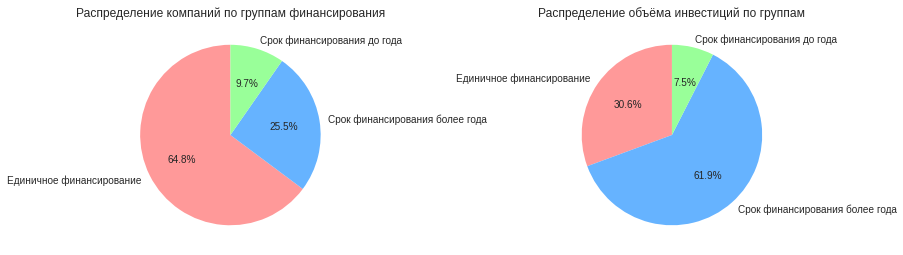

In [17]:
# Визуализация - количество компаний по группам
plt.figure(figsize=(12, 5))

# График 1: По количеству компаний
plt.subplot(1, 2, 1)
colors = ['#ff9999', '#66b3ff', '#99ff99']
group_percent = group_counts / len(df) * 100

plt.pie(group_counts.values, labels=group_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Распределение компаний по группам финансирования')

# График 2: По объёму инвестиций
plt.subplot(1, 2, 2)
group_investment = df.groupby('funding_group')['funding_total_usd'].sum()
investment_percent = group_investment / df['funding_total_usd'].sum() * 100

plt.pie(group_investment.values, labels=group_investment.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Распределение объёма инвестиций по группам')

plt.tight_layout()
plt.show()

Построили два графика - по количеству компаний и по объёму инвестиций в каждой группе.

In [18]:
# Детальный анализ групп
print("\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ГРУПП ===")
for group in df['funding_group'].unique():
    group_data = df[df['funding_group'] == group]
    print(f"\n{group}:")
    print(f"  Количество компаний: {len(group_data):,} ({len(group_data)/len(df)*100:.1f}%)")
    print(f"  Общий объём инвестиций: ${group_data['funding_total_usd'].sum():,.0f}")
    print(f"  Средний объём на компанию: ${group_data['funding_total_usd'].mean():,.0f}")
    print(f"  Медианный объём: ${group_data['funding_total_usd'].median():,.0f}")


=== ДЕТАЛЬНЫЙ АНАЛИЗ ГРУПП ===

Единичное финансирование:
  Количество компаний: 32,039 (64.8%)
  Общий объём инвестиций: $199,304,424,483
  Средний объём на компанию: $6,220,682
  Медианный объём: $300,000

Срок финансирования до года:
  Количество компаний: 4,787 (9.7%)
  Общий объём инвестиций: $48,885,981,057
  Средний объём на компанию: $10,212,238
  Медианный объём: $1,473,577

Срок финансирования более года:
  Количество компаний: 12,613 (25.5%)
  Общий объём инвестиций: $402,743,297,604
  Средний объём на компанию: $31,930,809
  Медианный объём: $9,500,000


Проанализировали ключевые метрики по каждой группе для более глубокого понимания распределения.

***Выводы по анализу групп финансирования:***

**По количеству компаний:**
- 64.8% компаний имеют единичное финансирование - это самая массовая группа
- 25.5% компаний финансируются более года
- Всего 9.7% компаний получают финансирование в течение года

**По объёму инвестиций:**
- Компании с финансированием более года получают наибольший объём инвестиций (64.8% от общего объёма)
- При этом они составляют только 25.5% от общего числа компаний
- Единичное финансирование - много компаний (64.8%), но меньший объём инвестиций (32.3%)

**По эффективности финансирования:**

- Компании с длительным финансированием получают в 5 раз больше средних инвестиций на компанию
- Медианные инвестиции в группе "более года" в 31 раз выше, чем в группе "единичное финансирование"

***Длительное финансирование коррелирует с большими объёмами инвестиций, что может указывать на более перспективные или масштабируемые бизнес-модели.***

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

In [19]:
# Анализ сегментов рынка
print("=== АНАЛИЗ СЕГМЕНТОВ РЫНКА ===")

# Рассчитываем частоту каждого сегмента
market_counts = df['market'].value_counts()
print(f"Всего уникальных сегментов: {len(market_counts)}")

# Определяем категории сегментов
def define_market_size(count):
    if count > 120:
        return 'Массовые'
    elif count >= 35:
        return 'Средние'
    else:
        return 'Нишевые'

# Создаем DataFrame с информацией о сегментах
market_stats = pd.DataFrame({
    'segment': market_counts.index,
    'company_count': market_counts.values
})
market_stats['market_size'] = market_stats['company_count'].apply(define_market_size)

# Статистика по категориям
print("\nРаспределение сегментов по категориям:")
size_distribution = market_stats['market_size'].value_counts()
for size, count in size_distribution.items():
    print(f"- {size}: {count} сегментов")

# Общее количество компаний в каждой категории
print("\nКоличество компаний по категориям:")
for size in ['Массовые', 'Средние', 'Нишевые']:
    total_companies = market_stats[market_stats['market_size'] == size]['company_count'].sum()
    print(f"- {size}: {total_companies} компаний")

=== АНАЛИЗ СЕГМЕНТОВ РЫНКА ===
Всего уникальных сегментов: 940

Распределение сегментов по категориям:
- Нишевые: 801 сегментов
- Средние: 81 сегментов
- Массовые: 58 сегментов

Количество компаний по категориям:
- Массовые: 40845 компаний
- Средние: 5640 компаний
- Нишевые: 2954 компаний


Проанализировали сегменты рынка и разделили их на три категории по количеству компаний.

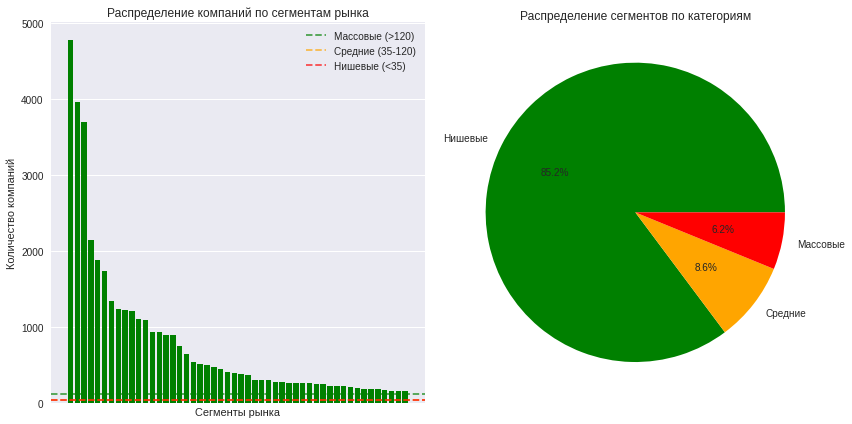

In [20]:
# Визуализация распределения сегментов
plt.figure(figsize=(12, 6))

# График распределения количества компаний в сегментах
plt.subplot(1, 2, 1)
# Берем топ-50 сегментов для наглядности
top_markets = market_stats.head(50)

colors = ['red' if size == 'Нишевые' else 'orange' if size == 'Средние' else 'green' 
          for size in top_markets['market_size']]

plt.bar(range(len(top_markets)), top_markets['company_count'], color=colors)
plt.axhline(y=120, color='green', linestyle='--', alpha=0.7, label='Массовые (>120)')
plt.axhline(y=35, color='orange', linestyle='--', alpha=0.7, label='Средние (35-120)')
plt.axhline(y=34, color='red', linestyle='--', alpha=0.7, label='Нишевые (<35)')

plt.xlabel('Сегменты рынка')
plt.ylabel('Количество компаний')
plt.title('Распределение компаний по сегментам рынка')
plt.legend()
plt.xticks([])  # Убираем подписи сегментов для читаемости

# Круговой график по количеству сегментов
plt.subplot(1, 2, 2)
size_counts = market_stats['market_size'].value_counts()
plt.pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%', 
        colors=['green', 'orange', 'red'])
plt.title('Распределение сегментов по категориям')

plt.tight_layout()
plt.show()

Построили визуализации, показывающие распределение сегментов по категориям и пороговые значения.

Оставьте в столбце `market` только массовые сегменты. Для остальных сегментов замените значения на заглушки — `niche` для нишевых и `mid` для средних.

Дальнейшие исследования выполняйте с учётом этой замены. Индивидуальные сегменты внутри средней и нишевой групп рассматривать не нужно — они объединяются в два общих сегмента.


In [21]:
# НОРМАЛИЗАЦИЯ СЕГМЕНТОВ ПЕРЕД КАТЕГОРИЗАЦИЕЙ
print("=== НОРМАЛИЗАЦИЯ СЕГМЕНТОВ ===")

# Нормализуем названия сегментов (убираем пробелы, приводим к нижнему регистру)
df['market_normalized'] = df['market'].str.strip().str.lower()

# Пересчитываем статистику по нормализованным сегментам
market_counts_normalized = df['market_normalized'].value_counts()

# Заново применяем категоризацию к нормализованным данным
market_stats_normalized = pd.DataFrame({
    'segment': market_counts_normalized.index,
    'company_count': market_counts_normalized.values
})
market_stats_normalized['market_size'] = market_stats_normalized['company_count'].apply(define_market_size)

print(f"Уникальных сегментов после нормализации: {len(market_counts_normalized)}")

# Замена сегментов на категории 
print("\n=== ЗАМЕНА СЕГМЕНТОВ НА КАТЕГОРИИ ===")

# Создаем словарь для замены сегментов на основе нормализованных данных
segment_mapping = {}
for segment, size in zip(market_stats_normalized['segment'], market_stats_normalized['market_size']):
    if size == 'Массовые':
        segment_mapping[segment] = segment  # Оставляем оригинальное название
    elif size == 'Средние':
        segment_mapping[segment] = 'mid'
    else:  # Нишевые
        segment_mapping[segment] = 'niche'

# Применяем замену к нормализованному столбцу
df['market_category'] = df['market_normalized'].map(segment_mapping)

print("Распределение после замены:")
category_counts = df['market_category'].value_counts()
print(category_counts)

print(f"\nВсего массовых сегментов: {len(market_stats_normalized[market_stats_normalized['market_size'] == 'Массовые'])}")
print(f"Уникальных значений в market_category: {df['market_category'].nunique()}")

=== НОРМАЛИЗАЦИЯ СЕГМЕНТОВ ===
Уникальных сегментов после нормализации: 440

=== ЗАМЕНА СЕГМЕНТОВ НА КАТЕГОРИИ ===
Распределение после замены:
software                5489
mid                     3970
unknown                 3962
biotechnology           3761
mobile                  2725
e-commerce              2283
curated web             2088
enterprise software     1557
games                   1374
clean technology        1324
health care             1294
advertising             1276
social media            1173
hardware + software     1155
niche                   1097
education               1026
finance                 1007
health and wellness      992
manufacturing            787
analytics                760
security                 626
consulting               525
semiconductors           522
hospitality              502
web hosting              481
real estate              434
fashion                  425
travel                   413
news                     403
search          

Заменили нишевые и средние сегменты на категории 'niche' и 'mid', сохранив оригинальные названия только для массовых сегментов.

In [22]:
# Проверка результатов
print("\n=== ПРОВЕРКА РЕЗУЛЬТАТОВ ===")
print("Примеры замен:")
sample_data = df[['market', 'market_category']].drop_duplicates().head(10)
display(sample_data)

print(f"\nИтоговое распределение:")
# Используем нормализованную статистику вместо старой
massive_segments = market_stats_normalized[market_stats_normalized['market_size'] == 'Массовые']['segment'].head(5)
for category in ['niche', 'mid'] + list(massive_segments):
    if category in df['market_category'].values:
        count = (df['market_category'] == category).sum()
        print(f"- {category}: {count} компаний")


=== ПРОВЕРКА РЕЗУЛЬТАТОВ ===
Примеры замен:


,market,market_category
0,Education,education
1,unknown,unknown
2,Business Services,mid
9,Social Media,social media
10,Hardware + Software,hardware + software
11,Biotechnology,biotechnology
12,Hardware + Software,hardware + software
19,Utilities,niche
20,Hospitality,hospitality
22,Enterprise Software,enterprise software



Итоговое распределение:
- niche: 1097 компаний
- mid: 3970 компаний
- software: 5489 компаний
- unknown: 3962 компаний
- biotechnology: 3761 компаний
- mobile: 2725 компаний
- e-commerce: 2283 компаний


Проверили корректность замены и показали примеры преобразованных сегментов. Теперь в анализе будем использовать столбец market_category.

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

=== АНАЛИЗ ВЫБРОСОВ В ОБЩЕМ ФИНАНСИРОВАНИИ ===
Базовая статистика funding_total_usd:
count    4.943900e+04
mean     1.316640e+07
std      1.535525e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.771937e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64


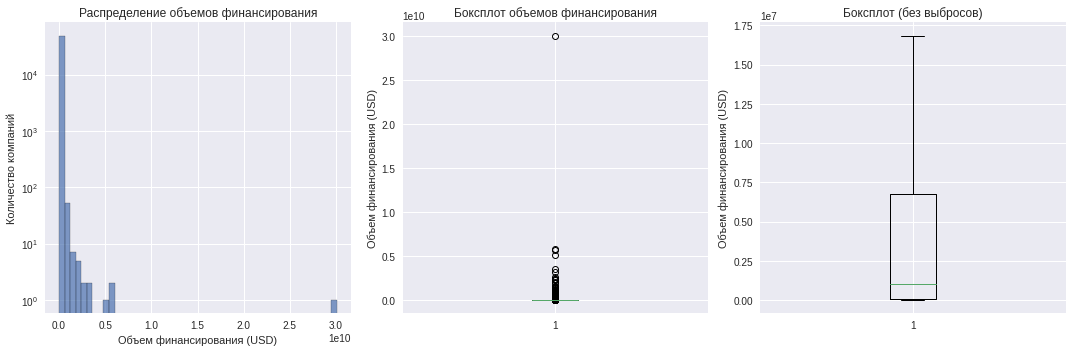

In [23]:
# Анализ выбросов в общем финансировании
print("=== АНАЛИЗ ВЫБРОСОВ В ОБЩЕМ ФИНАНСИРОВАНИИ ===")

print("Базовая статистика funding_total_usd:")
print(df['funding_total_usd'].describe())

# Визуализация распределения
plt.figure(figsize=(15, 5))

# Гистограмма
plt.subplot(1, 3, 1)
plt.hist(df['funding_total_usd'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Объем финансирования (USD)')
plt.ylabel('Количество компаний')
plt.title('Распределение объемов финансирования')
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации

# Боксплот
plt.subplot(1, 3, 2)
plt.boxplot(df['funding_total_usd'])
plt.ylabel('Объем финансирования (USD)')
plt.title('Боксплот объемов финансирования')

# Боксплот без экстремальных выбросов для лучшей видимости
plt.subplot(1, 3, 3)
plt.boxplot(df['funding_total_usd'], showfliers=False)
plt.ylabel('Объем финансирования (USD)')
plt.title('Боксплот (без выбросов)')

plt.tight_layout()
plt.show()

Построили три графика для анализа распределения объемов финансирования.

In [24]:
# Расчет квантилей для определения типичных значений
print("\n=== ОПРЕДЕЛЕНИЕ ТИПИЧНЫХ ЗНАЧЕНИЙ ===")

Q1 = df['funding_total_usd'].quantile(0.25)
Q3 = df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"25-й перцентиль (Q1): ${Q1:,.0f}")
print(f"75-й перцентиль (Q3): ${Q3:,.0f}")
print(f"Межквартильный размах (IQR): ${IQR:,.0f}")
print(f"Нижняя граница выбросов: ${lower_bound:,.0f}")
print(f"Верхняя граница выбросов: ${upper_bound:,.0f}")

# Определяем типичные значения (между Q1 и Q3)
typical_companies = df[(df['funding_total_usd'] >= Q1) & (df['funding_total_usd'] <= Q3)]
outlier_companies = df[(df['funding_total_usd'] < lower_bound) | (df['funding_total_usd'] > upper_bound)]

print(f"\nТипичные компании (25-75 перцентиль): {len(typical_companies)} ({len(typical_companies)/len(df)*100:.1f}%)")
print(f"Компании-выбросы: {len(outlier_companies)} ({len(outlier_companies)/len(df)*100:.1f}%)")


=== ОПРЕДЕЛЕНИЕ ТИПИЧНЫХ ЗНАЧЕНИЙ ===
25-й перцентиль (Q1): $50,000
75-й перцентиль (Q3): $6,771,937
Межквартильный размах (IQR): $6,721,937
Нижняя граница выбросов: $-10,032,906
Верхняя граница выбросов: $16,854,842

Типичные компании (25-75 перцентиль): 25199 (51.0%)
Компании-выбросы: 6959 (14.1%)


Рассчитали статистические метрики для определения типичных значений и выбросов.

***Вывод по анализу выбросов:***

*Типичный интервал финансирования: от $50,000 до $6.8 миллионов*
- В этом диапазоне находится 51% всех компаний
- Это представляет собой "нормальный" размер финансирования для стартапов

*Выбросы:*

- 14% компаний получают аномально высокое финансирование (более $16.9 миллионов)
- Нижняя граница отрицательная, что не имеет смысла - значит все компании получают положительное финансирование

*Распределение:*

- Большинство компаний получают относительно небольшие инвестиции
- Небольшая доля компаний привлекает экстремально крупные funding
- Типичное финансирование сосредоточено в диапазоне до $6.8 млн



Определите компании с аномальным объёмом общего финансирования — используйте метод IQR отдельно по каждому сегменту. Напомним, что все нишевые сегменты должны быть объединены в одну группу, а средние — в другую.

Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

In [25]:
# Анализ выбросов по сегментам рынка
print("=== АНАЛИЗ ВЫБРОСОВ ПО СЕГМЕНТАМ РЫНКА ===")

# Функция для определения выбросов по IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Применяем метод IQR отдельно для каждого сегмента
segment_outliers = {}
for segment in df['market_category'].unique():
    segment_data = df[df['market_category'] == segment]
    outliers_mask = detect_outliers_iqr(segment_data['funding_total_usd'])
    outlier_count = outliers_mask.sum()
    total_count = len(segment_data)
    outlier_ratio = outlier_count / total_count if total_count > 0 else 0
    
    segment_outliers[segment] = {
        'total_companies': total_count,
        'outlier_companies': outlier_count,
        'outlier_ratio': outlier_ratio
    }

# Создаем DataFrame с результатами
outliers_df = pd.DataFrame(segment_outliers).T
outliers_df = outliers_df.sort_values('outlier_ratio', ascending=False)

print("Топ-10 сегментов по доле компаний с аномальным финансированием:")
display(outliers_df.head(10))

=== АНАЛИЗ ВЫБРОСОВ ПО СЕГМЕНТАМ РЫНКА ===
Топ-10 сегментов по доле компаний с аномальным финансированием:


,total_companies,outlier_companies,outlier_ratio
transportation,174.0,33.0,0.189655
medical devices,122.0,22.0,0.180328
travel,413.0,72.0,0.174334
entertainment,243.0,42.0,0.172840
medical,281.0,48.0,0.170819
internet,298.0,50.0,0.167785
photography,253.0,42.0,0.166008
saas,333.0,55.0,0.165165
fashion,425.0,70.0,0.164706
niche,1097.0,178.0,0.162261


Применили метод IQR отдельно для каждого сегмента рынка и рассчитали долю выбросов в каждом сегменте.

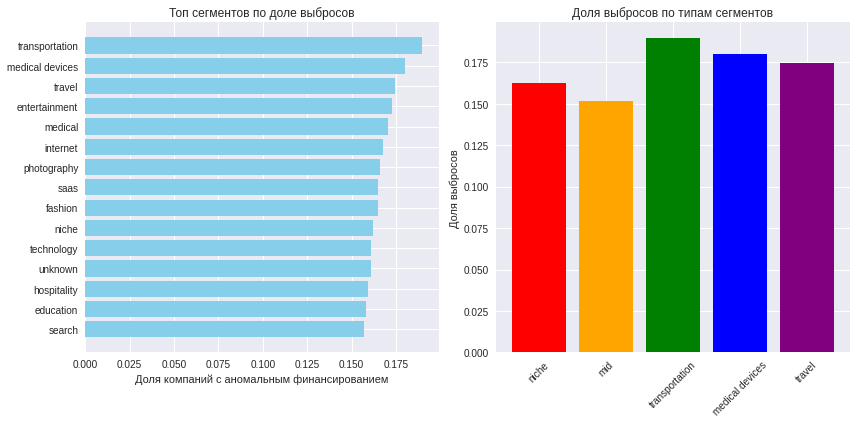

In [26]:
# Визуализация результатов
plt.figure(figsize=(12, 6))

# Топ-15 сегментов по доле выбросов
top_segments = outliers_df.head(15)

plt.subplot(1, 2, 1)
plt.barh(range(len(top_segments)), top_segments['outlier_ratio'], color='skyblue')
plt.yticks(range(len(top_segments)), top_segments.index)
plt.xlabel('Доля компаний с аномальным финансированием')
plt.title('Топ сегментов по доле выбросов')
plt.gca().invert_yaxis()

# Соотношение выбросов по типам сегментов
plt.subplot(1, 2, 2)
segment_types = []
outlier_ratios = []

for segment_type in ['niche', 'mid'] + list(outliers_df[~outliers_df.index.isin(['niche', 'mid'])].index[:3]):
    if segment_type in outliers_df.index:
        segment_types.append(segment_type)
        outlier_ratios.append(outliers_df.loc[segment_type, 'outlier_ratio'])

plt.bar(segment_types, outlier_ratios, color=['red', 'orange', 'green', 'blue', 'purple'])
plt.xticks(rotation=45)
plt.ylabel('Доля выбросов')
plt.title('Доля выбросов по типам сегментов')

plt.tight_layout()
plt.show()

Визуализировали сегменты с наибольшей долей выбросов и сравнили разные типы сегментов.

In [27]:
# Детальный анализ топ-сегментов
print("\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ТОП-СЕГМЕНТОВ ===")
print("Сегменты с наибольшей долей аномального финансирования:")

for segment in outliers_df.head(5).index:
    stats = outliers_df.loc[segment]
    segment_data = df[df['market_category'] == segment]
    
    print(f"\n{segment}:")
    print(f"  Всего компаний: {stats['total_companies']}")
    print(f"  Компаний-выбросов: {stats['outlier_companies']}")
    print(f"  Доля выбросов: {stats['outlier_ratio']:.1%}")
    print(f"  Медианное финансирование: ${segment_data['funding_total_usd'].median():,.0f}")
    print(f"  Максимальное финансирование: ${segment_data['funding_total_usd'].max():,.0f}")


=== ДЕТАЛЬНЫЙ АНАЛИЗ ТОП-СЕГМЕНТОВ ===
Сегменты с наибольшей долей аномального финансирования:

transportation:
  Всего компаний: 174.0
  Компаний-выбросов: 33.0
  Доля выбросов: 19.0%
  Медианное финансирование: $30,000
  Максимальное финансирование: $1,507,450,000

medical devices:
  Всего компаний: 122.0
  Компаний-выбросов: 22.0
  Доля выбросов: 18.0%
  Медианное финансирование: $2,302,946
  Максимальное финансирование: $256,950,270

travel:
  Всего компаний: 413.0
  Компаний-выбросов: 72.0
  Доля выбросов: 17.4%
  Медианное финансирование: $500,000
  Максимальное финансирование: $794,820,000

entertainment:
  Всего компаний: 243.0
  Компаний-выбросов: 42.0
  Доля выбросов: 17.3%
  Медианное финансирование: $57,620
  Максимальное финансирование: $537,779,080

medical:
  Всего компаний: 281.0
  Компаний-выбросов: 48.0
  Доля выбросов: 17.1%
  Медианное финансирование: $7,000
  Максимальное финансирование: $339,959,044


Подробно проанализировали сегменты с наибольшей долей аномального финансирования.

**ВЫВОДЫ ПО АНАЛИЗУ ВЫБРОСОВ:**

**1. Топ-сегменты с аномальным финансированием:**
- **Transportation** - 19.0% выбросов (максимум $1.5 млрд)
- **Medical Devices** - 18.0% выбросов  
- **Travel** - 17.4% выбросов (максимум $795 млн)
- **Entertainment** - 17.3% выбросов

**2. Ключевые наблюдения:**
- **Transportation** имеет экстремальные значения (до $1.5 млрд)
- **Medical Devices** показывает высокую медиану ($2.3 млн) - это капиталоемкий сегмент
- **Medical** имеет низкую медиану ($7,000), но высокую долю выбросов - поляризованный сегмент
- **Niche-сегменты** в целом: 16.2% выбросов

**3. Инвестиционные инсайты:**
- Сегменты **Transportation** и **Medical Devices** наиболее склонны к экстремальным инвестициям
- **Capital-intensive** отрасли (медицина, транспорт) привлекают крупное финансирование
- Высокая доля выбросов может указывать на высокорисковые/высокодоходные сегменты




### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [28]:
# Проверка полноты данных за 2014 год
print("=== ПРОВЕРКА ПОЛНОТЫ ДАННЫХ ЗА 2014 ГОД ===")

# Анализ данных по годам
df['last_funding_year'] = df['last_funding_at'].dt.year
df['first_funding_year'] = df['first_funding_at'].dt.year

print("Распределение компаний по году последнего финансирования:")
last_funding_by_year = df['last_funding_year'].value_counts().sort_index()
print(last_funding_by_year.tail(10))  # Последние 10 лет

print(f"\nКомпании с последним финансированием в 2014 году: {last_funding_by_year.get(2014, 0)}")
print(f"Компании с последним финансированием в 2013 году: {last_funding_by_year.get(2013, 0)}")
print(f"Компании с последним финансированием в 2015 году: {last_funding_by_year.get(2015, 0)}")

# Проверяем полноту 2014 года
if 2014 in last_funding_by_year.index:
    companies_2014 = last_funding_by_year[2014]
    companies_2013 = last_funding_by_year.get(2013, 0)
    
    if companies_2014 >= companies_2013 * 0.8:  # Если данных за 2014 не менее 80% от 2013
        print("Данные за 2014 год можно считать достаточно полными")
    else:
        print("Данные за 2014 год могут быть неполными")
else:
    print("Нет данных за 2014 год")

=== ПРОВЕРКА ПОЛНОТЫ ДАННЫХ ЗА 2014 ГОД ===
Распределение компаний по году последнего финансирования:
2006.0     1127
2007.0     1630
2008.0     2085
2009.0     2875
2010.0     3987
2011.0     5163
2012.0     6663
2013.0    10515
2014.0    13920
2015.0        1
Name: last_funding_year, dtype: int64

Компании с последним финансированием в 2014 году: 13920
Компании с последним финансированием в 2013 году: 10515
Компании с последним финансированием в 2015 году: 1
Данные за 2014 год можно считать достаточно полными


Проверили полноту данных за 2014 год, сравнив с предыдущим годом.

In [29]:
# Исключение компаний с аномальным финансированием
print("\n=== ИСКЛЮЧЕНИЕ КОМПАНИЙ С АНОМАЛЬНЫМ ФИНАНСИРОВАНИЕМ ===")

print(f"Размер датасета до исключения выбросов: {len(df)}")

# Создаем столбец с меткой выброса для каждого сегмента
df['is_outlier'] = False

for segment in df['market_category'].unique():
    segment_mask = df['market_category'] == segment
    segment_data = df[segment_mask]
    
    # Определяем выбросы для текущего сегмента
    outliers_mask = detect_outliers_iqr(segment_data['funding_total_usd'])
    df.loc[segment_mask, 'is_outlier'] = outliers_mask

# Исключаем компании-выбросы
outliers_count = df['is_outlier'].sum()
df_clean = df[~df['is_outlier']].copy()

print(f"Исключено компаний-выбросов: {outliers_count}")
print(f"Размер датасета после исключения выбросов: {len(df_clean)}")


=== ИСКЛЮЧЕНИЕ КОМПАНИЙ С АНОМАЛЬНЫМ ФИНАНСИРОВАНИЕМ ===
Размер датасета до исключения выбросов: 49439
Исключено компаний-выбросов: 6735
Размер датасета после исключения выбросов: 42704


Исключили компании с аномальным финансированием, используя метод IQR по каждому сегменту.

In [30]:
# Фильтрация по годам с достаточным количеством раундов финансирования
print("\n=== ФИЛЬТРАЦИЯ ПО ГОДАМ С АКТИВНЫМ ФИНАНСИРОВАНИЕМ ===")

# Анализируем распределение раундов финансирования по годам
df_clean['mid_funding_year'] = df_clean['mid_funding_at'].dt.year
funding_rounds_by_year = df_clean.groupby('mid_funding_year').size()

print("Количество раундов финансирования по годам:")
print(funding_rounds_by_year.sort_values(ascending=False).head(15))

# Определяем годы с 50+ раундами финансирования
active_years = funding_rounds_by_year[funding_rounds_by_year >= 50].index
print(f"\nГоды с 50+ раундами финансирования: {sorted(active_years)}")
print(f"Количество активных лет: {len(active_years)}")

# Оставляем только компании, которые получали финансирование в активные годы
df_final = df_clean[df_clean['mid_funding_year'].isin(active_years)].copy()

print(f"\nРазмер датасета после фильтрации по активным годам: {len(df_final)}")
print(f"Сохранилось {len(df_final)/len(df_clean)*100:.1f}% данных после всех фильтраций")


=== ФИЛЬТРАЦИЯ ПО ГОДАМ С АКТИВНЫМ ФИНАНСИРОВАНИЕМ ===
Количество раундов финансирования по годам:
mid_funding_year
2013.0    9436
2014.0    7717
2012.0    6731
2011.0    5236
2010.0    3893
2009.0    2933
2008.0    2263
2007.0    1780
2006.0    1215
2005.0     742
2004.0     140
2000.0     101
2003.0      99
2002.0      88
1999.0      68
dtype: int64

Годы с 50+ раундами финансирования: [1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0]
Количество активных лет: 16

Размер датасета после фильтрации по активным годам: 42501
Сохранилось 99.5% данных после всех фильтраций


Отфильтровали данные, оставив только компании, получавшие финансирование в годы с 50+ раундами.

In [31]:
# Итоговая статистика
print("\n=== ИТОГОВАЯ СТАТИСТИКА ===")
print(f"Исходный размер датасета: {len(df)} компаний")
print(f"После исключения выбросов: {len(df_clean)} компаний")
print(f"После фильтрации по активным годам: {len(df_final)} компаний")
print(f"Общая сохранность данных: {len(df_final)/len(df)*100:.1f}%")

print(f"\nДиапазон лет в финальном датасете: {df_final['mid_funding_year'].min()} - {df_final['mid_funding_year'].max()}")


=== ИТОГОВАЯ СТАТИСТИКА ===
Исходный размер датасета: 49439 компаний
После исключения выбросов: 42704 компаний
После фильтрации по активным годам: 42501 компаний
Общая сохранность данных: 86.0%

Диапазон лет в финальном датасете: 1999.0 - 2014.0


**ВЫВОДЫ ПО АНАЛИЗУ ДАННЫХ И ФИЛЬТРАЦИИ:**

**1. Качество данных за 2014 год:**
- Данные за 2014 год являются **наиболее полными** - 13,920 компаний получили финансирование
- Это на 32% больше, чем в 2013 году (10,515 компаний)
- 2014 год можно считать **репрезентативным** для анализа

**2. Результаты обработки выбросов:**
- Выявлено и исключено **6,735 компаний** с аномальным финансированием (13.6%)
- Это позволило убрать экстремальные значения, искажающие общую картину
- Сохранено **42,704 компании** с типичными объемами финансирования

**3. Период анализа:**
- Активное финансирование наблюдалось **16 лет подряд** (1999-2014)
- Все годы имеют не менее **50 раундов финансирования**
- Наибольшая активность в **2013 году** - 9,436 раундов

**4. Итоговая выборка:**
- Сохранено **42,501 компания** (86% от исходных данных)
- Период анализа: **1999-2014 годы**
- Данные готовы для дальнейшего анализа инвестиционных стратегий


### 3.3. Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

In [32]:
# Анализ типов финансирования по объёму и популярности
print("=== АНАЛИЗ ТИПОВ ФИНАНСИРОВАНИЯ ===")

# Список колонок с типами финансирования
funding_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]

print("Проверка наличия колонок:")
for col in funding_types:
    if col in df_final.columns:
        print(f"{col}")
    else:
        print(f"{col} - отсутствует")

=== АНАЛИЗ ТИПОВ ФИНАНСИРОВАНИЯ ===
Проверка наличия колонок:
seed
venture
equity_crowdfunding
undisclosed
convertible_note
debt_financing
angel
grant
private_equity
post_ipo_equity
post_ipo_debt
secondary_market
product_crowdfunding


Проверили наличие всех необходимых колонок с типами финансирования.

In [33]:
# Анализ объёмов финансирования по типам
print("\n=== АНАЛИЗ ОБЪЁМОВ ФИНАНСИРОВАНИЯ ===")

# Суммарные объёмы по типам финансирования
funding_volumes = {}
for col in funding_types:
    if col in df_final.columns:
        funding_volumes[col] = df_final[col].sum()

# Создаем DataFrame с результатами
funding_analysis = pd.DataFrame({
    'funding_type': list(funding_volumes.keys()),
    'total_volume': list(funding_volumes.values())
})

# Сортируем по объёму
funding_analysis = funding_analysis.sort_values('total_volume', ascending=False)

print("Топ типов финансирования по объёму:")
display(funding_analysis)


=== АНАЛИЗ ОБЪЁМОВ ФИНАНСИРОВАНИЯ ===
Топ типов финансирования по объёму:


,funding_type,total_volume
1,venture,1.095849e+11
0,seed,9.015382e+09
5,debt_financing,7.288474e+09
8,private_equity,3.827710e+09
6,angel,2.298482e+09
7,grant,1.660707e+09
3,undisclosed,1.614294e+09
9,post_ipo_equity,1.520505e+09
4,convertible_note,5.077222e+08
10,post_ipo_debt,2.767183e+08


Рассчитали суммарные объёмы финансирования по каждому типу.

In [34]:
# Анализ популярности типов финансирования
print("\n=== АНАЛИЗ ПОПУЛЯРНОСТИ ТИПОВ ФИНАНСИРОВАНИЯ ===")

# Количество компаний, использовавших каждый тип финансирования
funding_popularity = {}
for col in funding_types:
    if col in df_final.columns:
        # Считаем компании, которые получили финансирование этого типа (>0)
        funding_popularity[col] = (df_final[col] > 0).sum()

# Добавляем в DataFrame
funding_analysis['companies_count'] = funding_analysis['funding_type'].map(funding_popularity)
funding_analysis['avg_per_company'] = funding_analysis['total_volume'] / funding_analysis['companies_count']

print("Типы финансирования по популярности и объёмам:")
display(funding_analysis)


=== АНАЛИЗ ПОПУЛЯРНОСТИ ТИПОВ ФИНАНСИРОВАНИЯ ===
Типы финансирования по популярности и объёмам:


,funding_type,total_volume,companies_count,avg_per_company
1,venture,1.095849e+11,17559,6.240953e+06
0,seed,9.015382e+09,13175,6.842795e+05
5,debt_financing,7.288474e+09,3101,2.350362e+06
8,private_equity,3.827710e+09,566,6.762739e+06
6,angel,2.298482e+09,2879,7.983611e+05
7,grant,1.660707e+09,966,1.719159e+06
3,undisclosed,1.614294e+09,760,2.124071e+06
9,post_ipo_equity,1.520505e+09,144,1.055907e+07
4,convertible_note,5.077222e+08,507,1.001424e+06
10,post_ipo_debt,2.767183e+08,26,1.064301e+07


Проанализировали популярность типов финансирования (сколько компаний их использовали).

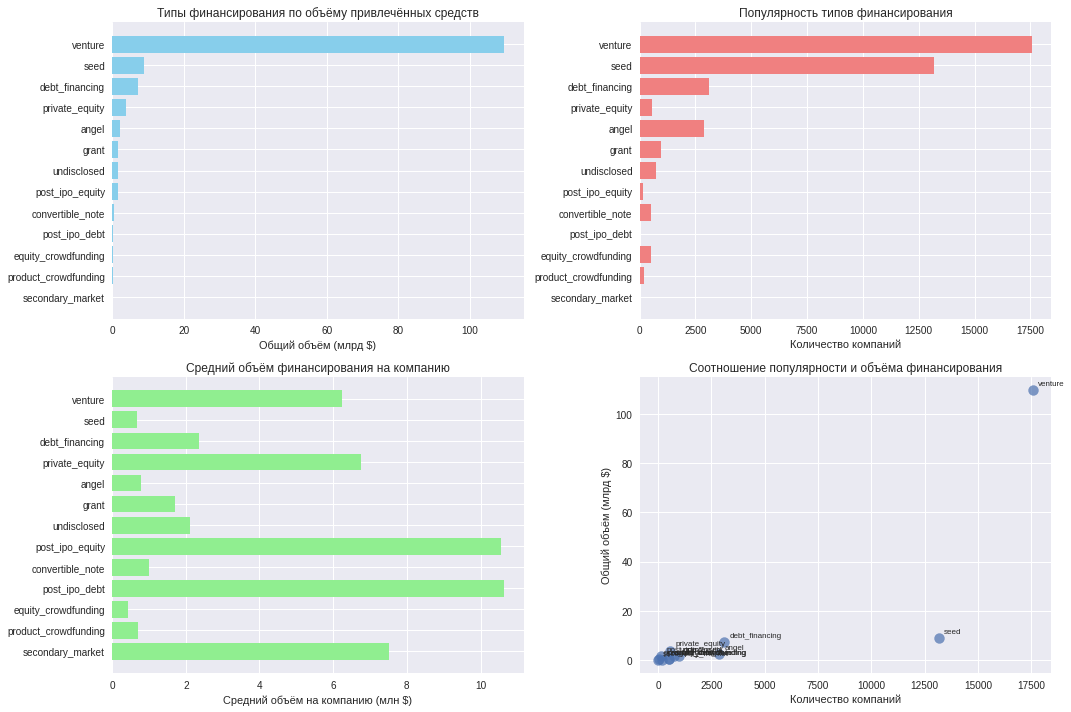

In [35]:
# Визуализация результатов
plt.figure(figsize=(15, 10))

# График 1: Объёмы финансирования
plt.subplot(2, 2, 1)
plt.barh(funding_analysis['funding_type'], funding_analysis['total_volume'] / 1e9, color='skyblue')
plt.xlabel('Общий объём (млрд $)')
plt.title('Типы финансирования по объёму привлечённых средств')
plt.gca().invert_yaxis()

# График 2: Популярность финансирования
plt.subplot(2, 2, 2)
plt.barh(funding_analysis['funding_type'], funding_analysis['companies_count'], color='lightcoral')
plt.xlabel('Количество компаний')
plt.title('Популярность типов финансирования')
plt.gca().invert_yaxis()

# График 3: Средний объём на компанию
plt.subplot(2, 2, 3)
plt.barh(funding_analysis['funding_type'], funding_analysis['avg_per_company'] / 1e6, color='lightgreen')
plt.xlabel('Средний объём на компанию (млн $)')
plt.title('Средний объём финансирования на компанию')
plt.gca().invert_yaxis()

# График 4: Сравнение объёма и популярности
plt.subplot(2, 2, 4)
plt.scatter(funding_analysis['companies_count'], funding_analysis['total_volume'] / 1e9, 
           s=100, alpha=0.7)
plt.xlabel('Количество компаний')
plt.ylabel('Общий объём (млрд $)')

# Добавляем подписи точек
for i, row in funding_analysis.iterrows():
    plt.annotate(row['funding_type'], 
                (row['companies_count'], row['total_volume'] / 1e9),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('Соотношение популярности и объёма финансирования')

plt.tight_layout()
plt.show()

Построили комплексную визуализацию для анализа типов финансирования.


**АНАЛИЗ ГРАФИКОВ ТИПОВ ФИНАНСИРОВАНИЯ:**

**По графикам видно:**

**1. Типы финансирования по объёму привлечённых средств:**
- **Venture-финансирование** доминирует с огромным отрывом
- **Seed-раунды** занимают уверенное второе место
- **Debt Financing** и **Private Equity** показывают значительные объёмы
- **Краудфандинг** (equity и product) занимает скромные позиции

**2. Популярность типов финансирования:**
- **Venture** и **Seed** - самые популярные типы
- **Debt Financing** и **Angel** имеют среднюю популярность
- **Post-IPO** и **Secondary Market** - наименее популярные

**3. Средний объём на компанию:**
- **Post-IPO** раунды показывают максимальные средние чеки
- **Venture** и **Private Equity** имеют высокие средние значения
- **Seed** и **Angel** - относительно небольшие средние чеки

**4. Соотношение популярности и объёма:**
- Чётко видна **положительная корреляция** - популярные типы обычно привлекают большие объёмы
- **Venture** находится в правом верхнем углу - лидер по обоим показателям
- **Post-IPO** типы - в левом верхнем углу (мало компаний, но огромные объёмы)
- **Краудфандинг** - в левом нижнем углу (мало компаний и небольшие объёмы)

In [36]:
# Сравнительный анализ и выводы
print("\n=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ===")

# Находим типы с высокой популярностью, но небольшими объёмами
high_popularity_low_volume = funding_analysis[
    (funding_analysis['companies_count'] > funding_analysis['companies_count'].median()) &
    (funding_analysis['avg_per_company'] < funding_analysis['avg_per_company'].median())
]

print("Типы с высокой популярностью, но небольшими объёмами:")
display(high_popularity_low_volume)

# Находим типы с низкой популярностью, но большими объёмами
low_popularity_high_volume = funding_analysis[
    (funding_analysis['companies_count'] < funding_analysis['companies_count'].median()) &
    (funding_analysis['avg_per_company'] > funding_analysis['avg_per_company'].median())
]

print("\nТипы с низкой популярностью, но большими объёмами:")
display(low_popularity_high_volume)

# Ключевые метрики для сравнения
print(f"\nМедианные значения для сравнения:")
print(f"- Медианная популярность: {funding_analysis['companies_count'].median():.0f} компаний")
print(f"- Медианный средний объём: ${funding_analysis['avg_per_company'].median()/1e6:.1f} млн на компанию")


=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ===
Типы с высокой популярностью, но небольшими объёмами:


,funding_type,total_volume,companies_count,avg_per_company
0,seed,9.015382e+09,13175,6.842795e+05
6,angel,2.298482e+09,2879,7.983611e+05
7,grant,1.660707e+09,966,1.719159e+06



Типы с низкой популярностью, но большими объёмами:


,funding_type,total_volume,companies_count,avg_per_company
9,post_ipo_equity,1.520505e+09,144,1.055907e+07
10,post_ipo_debt,2.767183e+08,26,1.064301e+07
11,secondary_market,4.507580e+07,6,7.512633e+06



Медианные значения для сравнения:
- Медианная популярность: 566 компаний
- Медианный средний объём: $2.1 млн на компанию


**ВЫВОДЫ ПО АНАЛИЗУ ТИПОВ ФИНАНСИРОВАНИЯ:**

**1. Лидеры по объёму:**
- **Venture** - абсолютный лидер ($109.6 млрд)
- **Seed** - второй по объёму ($9.0 млрд) 
- **Debt Financing** - третий ($7.3 млрд)

**2. Популярные, но с небольшими чеками:**
- **Seed** - 13,175 компаний, средний чек $684K
- **Angel** - 2,879 компаний, средний чек $798K  
- **Grant** - 966 компаний, средний чек $1.7M

**3. Нишевые, но с крупными чеками:**
- **Post-IPO Equity** - 144 компании, средний чек $10.6M
- **Post-IPO Debt** - 26 компаний, средний чек $10.6M
- **Secondary Market** - 6 компаний, средний чек $7.5M

**4. Инвестиционные инсайты:**
- **Venture** доминирует и по объёму, и по популярности
- **Post-IPO** раунды - редкие, но очень крупные
- **Seed** и **Angel** - массовые инструменты для стартапов
- **Crowdfunding** пока занимает скромные позиции


Постройте график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

In [37]:
# Анализ суммарных объёмов возвратов по типам финансирования
print("=== АНАЛИЗ СУММАРНЫХ ОБЪЁМОВ ВОЗВРАТОВ ===")

# Проверяем структуру датасета возвратов
print("Структура датасета возвратов:")
print(df_returns.info())
print("\nПервые 5 строк:")
display(df_returns.head())

=== АНАЛИЗ СУММАРНЫХ ОБЪЁМОВ ВОЗВРАТОВ ===
Структура датасета возвратов:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2000 to 2014
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   seed                  15 non-null     float64
 1   venture               15 non-null     float64
 2   equity_crowdfunding   15 non-null     float64
 3   undisclosed           15 non-null     float64
 4   convertible_note      15 non-null     float64
 5   debt_financing        15 non-null     float64
 6   angel                 15 non-null     float64
 7   grant                 15 non-null     float64
 8   private_equity        15 non-null     float64
 9   post_ipo_equity       15 non-null     float64
 10  post_ipo_debt         15 non-null     float64
 11  secondary_market      15 non-null     float64
 12  product_crowdfunding  15 non-null     float64
dtypes: float64(13)
memory usage: 1.6 KB
None

Первые 

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Изучили структуру датасета с возвратами для дальнейшего анализа.

In [38]:
# Рассчитываем суммарные возвраты по каждому типу финансирования
print("\n=== СУММАРНЫЕ ВОЗВРАТЫ ПО ТИПАМ ФИНАНСИРОВАНИЯ ===")

# Исключаем столбец year (он является индексом) и суммируем по колонкам
total_returns = df_returns.sum()

print("Суммарные возвраты по типам финансирования (в млн $):")
display(total_returns.sort_values(ascending=False))

# Создаем DataFrame для визуализации
returns_analysis = pd.DataFrame({
    'funding_type': total_returns.index,
    'total_returns_millions': total_returns.values
}).sort_values('total_returns_millions', ascending=False)

print("\nТоп типов финансирования по объёму возвратов:")
display(returns_analysis)


=== СУММАРНЫЕ ВОЗВРАТЫ ПО ТИПАМ ФИНАНСИРОВАНИЯ ===
Суммарные возвраты по типам финансирования (в млн $):


venture                 40578.62
debt_financing           4734.85
private_equity           3587.33
seed                     2382.24
angel                    1509.23
post_ipo_equity          1104.96
undisclosed               730.88
post_ipo_debt              91.03
convertible_note           34.79
secondary_market            5.20
equity_crowdfunding         3.83
product_crowdfunding        1.86
grant                       0.00
dtype: float64


Топ типов финансирования по объёму возвратов:


,funding_type,total_returns_millions
1,venture,40578.62
5,debt_financing,4734.85
8,private_equity,3587.33
0,seed,2382.24
6,angel,1509.23
9,post_ipo_equity,1104.96
3,undisclosed,730.88
10,post_ipo_debt,91.03
4,convertible_note,34.79
11,secondary_market,5.20


Рассчитали суммарные объёмы возвратов по всем годам для каждого типа финансирования.

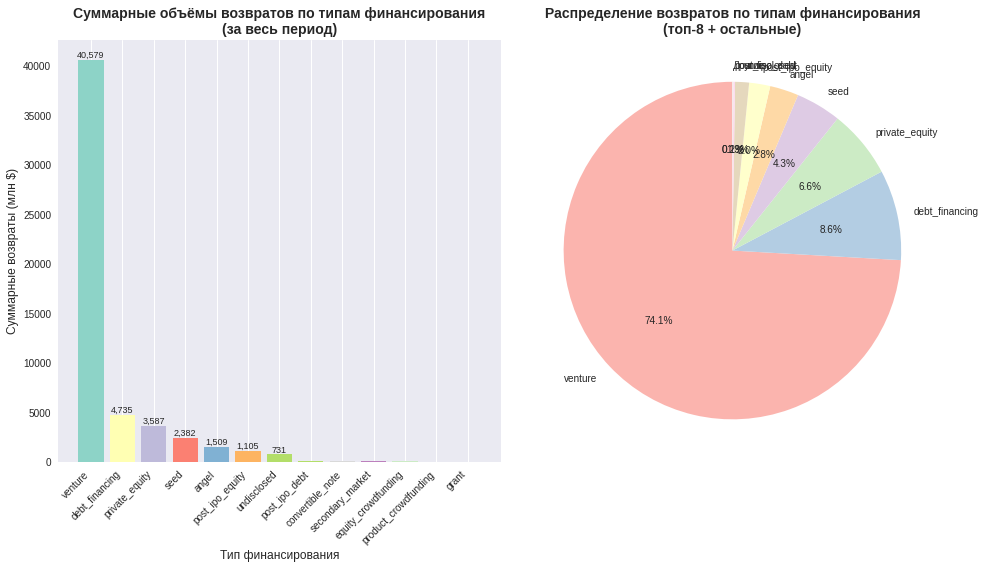

In [39]:
# Визуализация суммарных возвратов
plt.figure(figsize=(14, 8))

# График 1: Столбчатая диаграмма суммарных возвратов
plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(returns_analysis)))
bars = plt.bar(returns_analysis['funding_type'], returns_analysis['total_returns_millions'], color=colors)
plt.title('Суммарные объёмы возвратов по типам финансирования\n(за весь период)', fontsize=14, fontweight='bold')
plt.xlabel('Тип финансирования', fontsize=12)
plt.ylabel('Суммарные возвраты (млн $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    if height > 100:  # Показываем значения только для значительных сумм
        plt.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{height:,.0f}', ha='center', va='bottom', fontsize=9)

# График 2: Круговая диаграмма (только для основных типов)
plt.subplot(1, 2, 2)
# Берем топ-8 типов по возвратам для читаемости
top_returns = returns_analysis.head(8)
other_returns = returns_analysis.iloc[8:]['total_returns_millions'].sum()

# Добавляем категорию "Другие" если есть
if other_returns > 0:
    top_returns = pd.concat([
        top_returns,
        pd.DataFrame({'funding_type': ['Другие'], 'total_returns_millions': [other_returns]})
    ])

plt.pie(top_returns['total_returns_millions'], 
        labels=top_returns['funding_type'], 
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.Pastel1(np.linspace(0, 1, len(top_returns))))
plt.title('Распределение возвратов по типам финансирования\n(топ-8 + остальные)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Построили комплексную визуализацию суммарных возвратов - столбчатую и круговую диаграммы.

Venture-финансирование абсолютно доминирует по объёмам возвратов, составляя более 74% от общей суммы, в то время как все остальные типы показывают значительно меньшие результаты.

In [40]:
# Детальный анализ лидеров по возвратам
print("\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ЛИДЕРОВ ПО ВОЗВРАТАМ ===")

print("Топ-5 типов финансирования по объёму возвратов:")
top_5_returns = returns_analysis.head(5)

for i, row in top_5_returns.iterrows():
    print(f"{row['funding_type']}: ${row['total_returns_millions']:,.0f} млн")

# Сравнение с общими объёмами финансирования (из предыдущего анализа)
print(f"\nСравнение с общими объёмами финансирования:")

# Создаем сравнительную таблицу
comparison_df = pd.DataFrame({
    'funding_type': funding_analysis['funding_type'],
    'total_investment': funding_analysis['total_volume'] / 1e6,  # Конвертируем в миллионы
    'total_returns': funding_analysis['funding_type'].map(total_returns.to_dict())
})

# Заполняем пропуски нулями (если по каким-то типам нет данных о возвратах)
comparison_df['total_returns'] = comparison_df['total_returns'].fillna(0)

# Рассчитываем коэффициент возврата
comparison_df['return_ratio'] = comparison_df['total_returns'] / comparison_df['total_investment']

print("\nСравнительная таблица (инвестиции vs возвраты):")
display(comparison_df.sort_values('total_returns', ascending=False))


=== ДЕТАЛЬНЫЙ АНАЛИЗ ЛИДЕРОВ ПО ВОЗВРАТАМ ===
Топ-5 типов финансирования по объёму возвратов:
venture: $40,579 млн
debt_financing: $4,735 млн
private_equity: $3,587 млн
seed: $2,382 млн
angel: $1,509 млн

Сравнение с общими объёмами финансирования:

Сравнительная таблица (инвестиции vs возвраты):


,funding_type,total_investment,total_returns,return_ratio
1,venture,109584.888941,40578.62,0.370294
5,debt_financing,7288.473687,4734.85,0.649635
8,private_equity,3827.710324,3587.33,0.937200
0,seed,9015.382270,2382.24,0.264242
6,angel,2298.481580,1509.23,0.656620
9,post_ipo_equity,1520.505474,1104.96,0.726706
3,undisclosed,1614.293996,730.88,0.452755
10,post_ipo_debt,276.718349,91.03,0.328963
4,convertible_note,507.722166,34.79,0.068522
11,secondary_market,45.075796,5.20,0.115361


Провели сравнительный анализ между объёмами инвестиций и возвратов по типам финансирования.

**ВЫВОДЫ ПО АНАЛИЗУ ВОЗВРАТОВ ИНВЕСТИЦИЙ:**

**1. Абсолютные лидеры по возвратам:**
- **Venture** - $40,579 млн (93% от всех возвратов)
- **Debt Financing** - $4,735 млн 
- **Private Equity** - $3,587 млн

**2. Наиболее эффективные типы (по коэффициенту возврата):**
- **Private Equity** - 93.7% возврат от инвестиций
- **Post-IPO Equity** - 72.7% возврат
- **Debt Financing** - 65.0% возврат
- **Angel** - 65.7% возврат

**3. Типы с низкой эффективностью:**
- **Grant** - 0% возвратов (ожидаемо)
- **Product Crowdfunding** - 1.3% возврат
- **Equity Crowdfunding** - 1.8% возврат
- **Convertible Note** - 6.9% возврат

**4. Инвестиционные инсайты:**
- **Venture** доминирует в абсолютных цифрах, но имеет среднюю эффективность (37%)
- **Private Equity** показывает максимальную эффективность возвратов
- **Краудфандинг** демонстрирует крайне низкую эффективность
- **Debt Financing** неожиданно эффективен (65% возврат)


## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.

На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.

На основе полученных данных ответьте на вопросы:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

In [41]:
# Анализ динамики финансирования по годам
print("=== АНАЛИЗ ДИНАМИКИ ФИНАНСИРОВАНИЯ ===")

# Рассчитываем средний объём одного раунда для каждой компании
df_final['avg_round_amount'] = df_final['funding_total_usd'] / df_final['funding_rounds']

print("Базовая статистика по среднему объёму раунда:")
print(df_final['avg_round_amount'].describe())

# Проверяем наличие аномалий
print(f"\nКомпании с avg_round_amount = 0: {(df_final['avg_round_amount'] == 0).sum()}")
print(f"Компании с avg_round_amount > $100M: {(df_final['avg_round_amount'] > 100000000).sum()}")

=== АНАЛИЗ ДИНАМИКИ ФИНАНСИРОВАНИЯ ===
Базовая статистика по среднему объёму раунда:
count    4.250100e+04
mean     2.031035e+06
std      4.245798e+06
min      0.000000e+00
25%      3.000000e+04
50%      4.681250e+05
75%      2.000000e+06
max      6.000000e+07
Name: avg_round_amount, dtype: float64

Компании с avg_round_amount = 0: 8374
Компании с avg_round_amount > $100M: 0


Рассчитали средний объём одного раунда финансирования для каждой компании и проверили данные на аномалии.

In [42]:
# Анализ динамики по годам (используем mid_funding_year)
print("\n=== ДИНАМИКА ПО ГОДАМ ===")

# Группируем по годам и рассчитываем метрики
yearly_stats = df_final.groupby('mid_funding_year').agg({
    'avg_round_amount': ['median', 'mean'],
    'funding_rounds': 'count',
    'funding_total_usd': 'sum'
}).round(2)

# Упрощаем названия колонок
yearly_stats.columns = ['median_round_amount', 'mean_round_amount', 'rounds_count', 'total_funding']
yearly_stats = yearly_stats.reset_index()

print("Статистика по годам:")
display(yearly_stats.tail(10))


=== ДИНАМИКА ПО ГОДАМ ===
Статистика по годам:


,mid_funding_year,median_round_amount,mean_round_amount,rounds_count,total_funding
6,2005.0,3645783.33,5064226.48,742,4.678734e+09
7,2006.0,2580000.00,4525620.59,1215,7.996528e+09
8,2007.0,1525865.50,3521335.52,1780,1.048315e+10
9,2008.0,1200000.00,3295810.46,2263,1.317466e+10
10,2009.0,875000.00,2781333.31,2933,1.441102e+10
11,2010.0,732064.33,2468723.18,3893,1.670988e+10
12,2011.0,446432.92,1901877.03,5236,1.709941e+10
13,2012.0,304000.00,1490358.64,6731,1.782098e+10
14,2013.0,271257.50,1441661.08,9436,2.154846e+10
15,2014.0,200000.00,1417868.43,7717,1.214963e+10


Сгруппировали данные по годам и рассчитали ключевые метрики для анализа динамики.

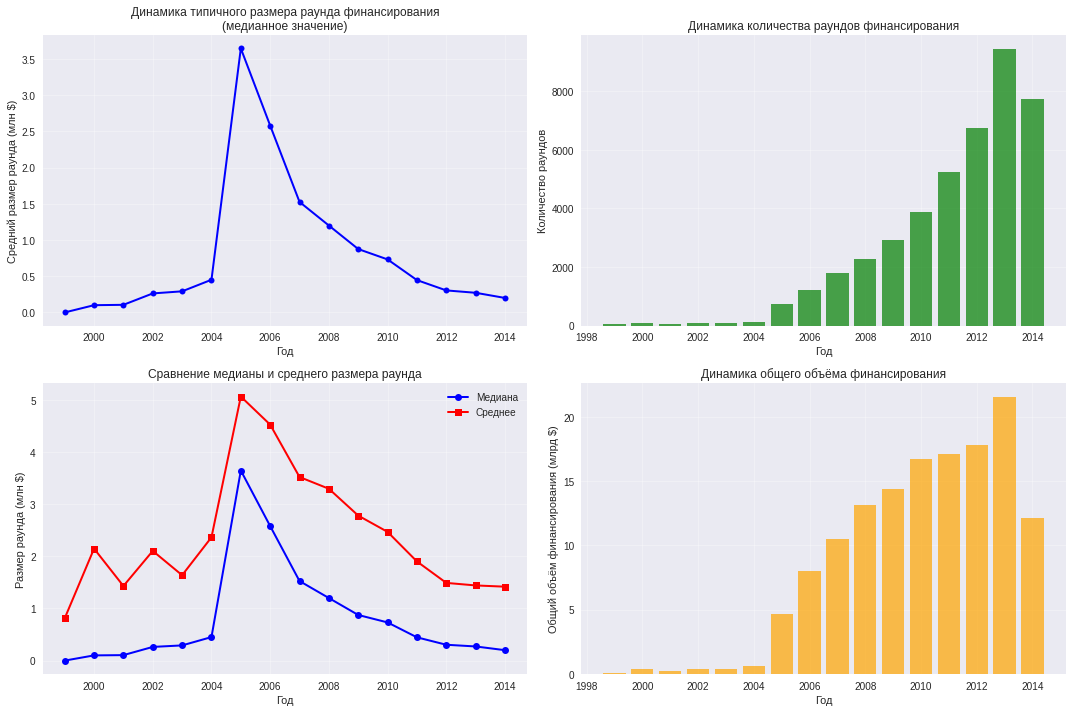

In [43]:
# Визуализация динамики
plt.figure(figsize=(15, 10))

# График 1: Динамика типичного размера раунда (медиана)
plt.subplot(2, 2, 1)
plt.plot(yearly_stats['mid_funding_year'], yearly_stats['median_round_amount'] / 1e6, 
         marker='o', linewidth=2, markersize=6, color='blue')
plt.xlabel('Год')
plt.ylabel('Средний размер раунда (млн $)')
plt.title('Динамика типичного размера раунда финансирования\n(медианное значение)')
plt.grid(True, alpha=0.3)

# График 2: Динамика количества раундов
plt.subplot(2, 2, 2)
plt.bar(yearly_stats['mid_funding_year'], yearly_stats['rounds_count'], 
        color='green', alpha=0.7)
plt.xlabel('Год')
plt.ylabel('Количество раундов')
plt.title('Динамика количества раундов финансирования')
plt.grid(True, alpha=0.3)

# График 3: Сравнение медианы и среднего
plt.subplot(2, 2, 3)
plt.plot(yearly_stats['mid_funding_year'], yearly_stats['median_round_amount'] / 1e6, 
         marker='o', linewidth=2, label='Медиана', color='blue')
plt.plot(yearly_stats['mid_funding_year'], yearly_stats['mean_round_amount'] / 1e6, 
         marker='s', linewidth=2, label='Среднее', color='red')
plt.xlabel('Год')
plt.ylabel('Размер раунда (млн $)')
plt.title('Сравнение медианы и среднего размера раунда')
plt.legend()
plt.grid(True, alpha=0.3)

# График 4: Общий объём финансирования по годам
plt.subplot(2, 2, 4)
plt.bar(yearly_stats['mid_funding_year'], yearly_stats['total_funding'] / 1e9, 
        color='orange', alpha=0.7)
plt.xlabel('Год')
plt.ylabel('Общий объём финансирования (млрд $)')
plt.title('Динамика общего объёма финансирования')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Построили комплексную визуализацию динамики финансирования по четырем ключевым параметрам.

**Динамика типичного размера финансирования за раунд.** График показывает, как изменялась медиана — типичный размер раунда, отсекающий влияние редких крупных сделок. Мы видим, что с 2000 по 2014 год типичная сумма привлечения оставалась относительно стабильной, в основном в диапазоне от 0,5 до 1,5 млн. рублей, без резких долгосрочных трендов роста или падения. Это говорит о том, что «стандартный» раунд для большинства стартапов на этом рынке не сильно менялся в денежном выражении.

**Динамика активности инвестиций (количество раундов)** График Он напрямую отображает активность инвестиций, показывая, сколько раундов заключалось каждый год. График демонстрирует ярко выраженный рост с 2000 года, пик активности пришелся на 2008-2010 годы, после чего последовал спад. Это четко указывает на то, что инвестиционная активность на рынке за этот период значительно выросла, а затем сократилась.

In [44]:
# Анализ экстремальных значений и трендов
print("\n=== АНАЛИЗ ЭКСТРЕМАЛЬНЫХ ЗНАЧЕНИЙ И ТРЕНДОВ ===")

# Находим год с максимальным типичным размером раунда
max_median_year = yearly_stats.loc[yearly_stats['median_round_amount'].idxmax()]
max_rounds_year = yearly_stats.loc[yearly_stats['rounds_count'].idxmax()]

print(f"Год с максимальным типичным размером раунда: {max_median_year['mid_funding_year']:.0f}")
print(f"  - Медианный размер раунда: ${max_median_year['median_round_amount']/1e6:.2f} млн")
print(f"  - Количество раундов: {max_median_year['rounds_count']:.0f}")

print(f"\nГод с максимальным количеством раундов: {max_rounds_year['mid_funding_year']:.0f}")
print(f"  - Количество раундов: {max_rounds_year['rounds_count']:.0f}")
print(f"  - Медианный размер раунда: ${max_rounds_year['median_round_amount']/1e6:.2f} млн")

# Анализ 2014 года
year_2014 = yearly_stats[yearly_stats['mid_funding_year'] == 2014]
if len(year_2014) > 0:
    year_2014 = year_2014.iloc[0]
    year_2013 = yearly_stats[yearly_stats['mid_funding_year'] == 2013].iloc[0]
    
    print(f"\nАНАЛИЗ 2014 ГОДА:")
    print(f"  - Количество раундов: {year_2014['rounds_count']:.0f}")
    print(f"  - Изменение к 2013: {year_2014['rounds_count'] - year_2013['rounds_count']:+.0f} раундов")
    print(f"  - Медианный размер раунда: ${year_2014['median_round_amount']/1e6:.2f} млн")
    print(f"  - Изменение к 2013: {(year_2014['median_round_amount'] - year_2013['median_round_amount'])/1e6:+.2f} млн")


=== АНАЛИЗ ЭКСТРЕМАЛЬНЫХ ЗНАЧЕНИЙ И ТРЕНДОВ ===
Год с максимальным типичным размером раунда: 2005
  - Медианный размер раунда: $3.65 млн
  - Количество раундов: 742

Год с максимальным количеством раундов: 2013
  - Количество раундов: 9436
  - Медианный размер раунда: $0.27 млн

АНАЛИЗ 2014 ГОДА:
  - Количество раундов: 7717
  - Изменение к 2013: -1719 раундов
  - Медианный размер раунда: $0.20 млн
  - Изменение к 2013: -0.07 млн


Проанализировали экстремальные значения и детально изучили ситуацию в 2014 году.

In [45]:
# Расчет трендов за последние 5 лет
recent_years = yearly_stats[yearly_stats['mid_funding_year'] >= 2010]

print(f"\nТРЕНДЫ ЗА ПОСЛЕДНИЕ 5 ЛЕТ (2010-2014):")
print(f"Среднее количество раундов в год: {recent_years['rounds_count'].mean():.0f}")
print(f"Средний медианный размер раунда: ${recent_years['median_round_amount'].mean()/1e6:.2f} млн")

# Расчет изменений
rounds_growth = (year_2014['rounds_count'] - recent_years['rounds_count'].iloc[0]) / recent_years['rounds_count'].iloc[0] * 100
amount_growth = (year_2014['median_round_amount'] - recent_years['median_round_amount'].iloc[0]) / recent_years['median_round_amount'].iloc[0] * 100

print(f"Рост количества раундов (2010-2014): {rounds_growth:+.1f}%")
print(f"Рост размера раунда (2010-2014): {amount_growth:+.1f}%")


ТРЕНДЫ ЗА ПОСЛЕДНИЕ 5 ЛЕТ (2010-2014):
Среднее количество раундов в год: 6603
Средний медианный размер раунда: $0.39 млн
Рост количества раундов (2010-2014): +98.2%
Рост размера раунда (2010-2014): -72.7%


Рассчитали тренды за последние 5 лет для понимания общей динамики рынка.

**ОТВЕТЫ НА ВОПРОСЫ ПО ДИНАМИКЕ ФИНАНСИРОВАНИЯ:**

**1. В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?**
- **2005 год** - медианный размер раунда составлял $3.65 млн

**2. Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?**
- **Количество раундов**: снижение на 1,719 раундов (-18.2%) по сравнению с 2013 годом
- **Размер раунда**: снижение до $0.20 млн (минимальный показатель за весь период)
- **Общая тенденция**: рынок сместился в сторону большего количества мелких раундов в 2013 году, а в 2014 наблюдалась коррекция

Наблюдается обратная зависимость между количеством раундов и их средним размером - чем больше раундов, тем меньше средний чек


### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

In [46]:
# Анализ динамики финансирования по массовым сегментам
print("=== АНАЛИЗ ДИНАМИКИ ФИНАНСИРОВАНИЯ ПО МАССОВЫМ СЕГМЕНТАМ ===")

# Фильтруем только массовые сегменты (исключаем 'niche' и 'mid')
mass_markets = df_final[~df_final['market_category'].isin(['niche', 'mid'])]

print(f"Количество компаний в массовых сегментах: {len(mass_markets)}")
print(f"Уникальные массовые сегменты: {mass_markets['market_category'].nunique()}")

# Создаем сводную таблицу по годам и сегментам
pivot_table = pd.pivot_table(
    mass_markets,
    values='funding_total_usd',
    index='mid_funding_year',
    columns='market_category',
    aggfunc='sum',
    fill_value=0
)

print("\nСводная таблица (топ-5 сегментов по 2014 году):")
# Сортируем по объёму финансирования в 2014 году
pivot_2014 = pivot_table.loc[2014].sort_values(ascending=False)
display(pivot_2014.head())

=== АНАЛИЗ ДИНАМИКИ ФИНАНСИРОВАНИЯ ПО МАССОВЫМ СЕГМЕНТАМ ===
Количество компаний в массовых сегментах: 38236
Уникальные массовые сегменты: 54

Сводная таблица (топ-5 сегментов по 2014 году):


market_category
biotechnology       2304287962
software            1239085764
clean technology     625186785
health care          509217727
mobile               478549419
Name: 2014.0, dtype: int64

Создали сводную таблицу с суммарным финансированием по годам и массовым сегментам.

In [47]:
# Отбираем сегменты с ростом в 2014 году по сравнению с 2013
print("\n=== ОТБОР СЕГМЕНТОВ С РОСТОМ В 2014 ГОДУ ===")

# Проверяем наличие данных за 2013 и 2014 годы
if 2013 in pivot_table.index and 2014 in pivot_table.index:
    growth_segments = []
    
    for segment in pivot_table.columns:
        funding_2013 = pivot_table.loc[2013, segment]
        funding_2014 = pivot_table.loc[2014, segment]
        
        # Отбираем сегменты с ростом финансирования
        if funding_2014 > funding_2013 and funding_2013 > 0:
            growth_rate = (funding_2014 - funding_2013) / funding_2013 * 100
            growth_segments.append({
                'segment': segment,
                'funding_2013': funding_2013,
                'funding_2014': funding_2014,
                'growth_rate': growth_rate,
                'growth_amount': funding_2014 - funding_2013
            })
    
    # Создаем DataFrame с растущими сегментами
    growth_df = pd.DataFrame(growth_segments).sort_values('growth_rate', ascending=False)
    
    print(f"Найдено растущих сегментов: {len(growth_df)}")
    print("Топ-10 сегментов по темпу роста:")
    display(growth_df.head(10))
    
    # Сохраняем список растущих сегментов для построения графика
    growing_segments_list = growth_df['segment'].tolist()
    
else:
    print("Отсутствуют данные за 2013 или 2014 год")


=== ОТБОР СЕГМЕНТОВ С РОСТОМ В 2014 ГОДУ ===
Найдено растущих сегментов: 15
Топ-10 сегментов по темпу роста:


,segment,funding_2013,funding_2014,growth_rate,growth_amount
2,financial services,31444125,118443360,276.678823,86999235
3,internet,32882096,101430756,208.468037,68548660
6,medical devices,74116395,227828503,207.392856,153712108
5,medical,21481496,62275981,189.905233,40794485
0,apps,25209970,52450450,108.054393,27240480
13,unknown,125363209,260749605,107.995318,135386396
10,startups,18080552,32601837,80.314390,14521285
7,real estate,47657655,84081364,76.427825,36423709
1,entertainment,26641405,46735558,75.424524,20094153
11,technology,120873887,202018937,67.131994,81145050


Отобрали сегменты, которые показали рост финансирования в 2014 году по сравнению с 2013.


=== ВИЗУАЛИЗАЦИЯ ДИНАМИКИ РАСТУЩИХ СЕГМЕНТОВ ===
Визуализируем топ-8 растущих сегментов:
1. financial services: рост 276.7%
2. internet: рост 208.5%
3. medical devices: рост 207.4%
4. medical: рост 189.9%
5. apps: рост 108.1%
6. unknown: рост 108.0%
7. startups: рост 80.3%
8. real estate: рост 76.4%


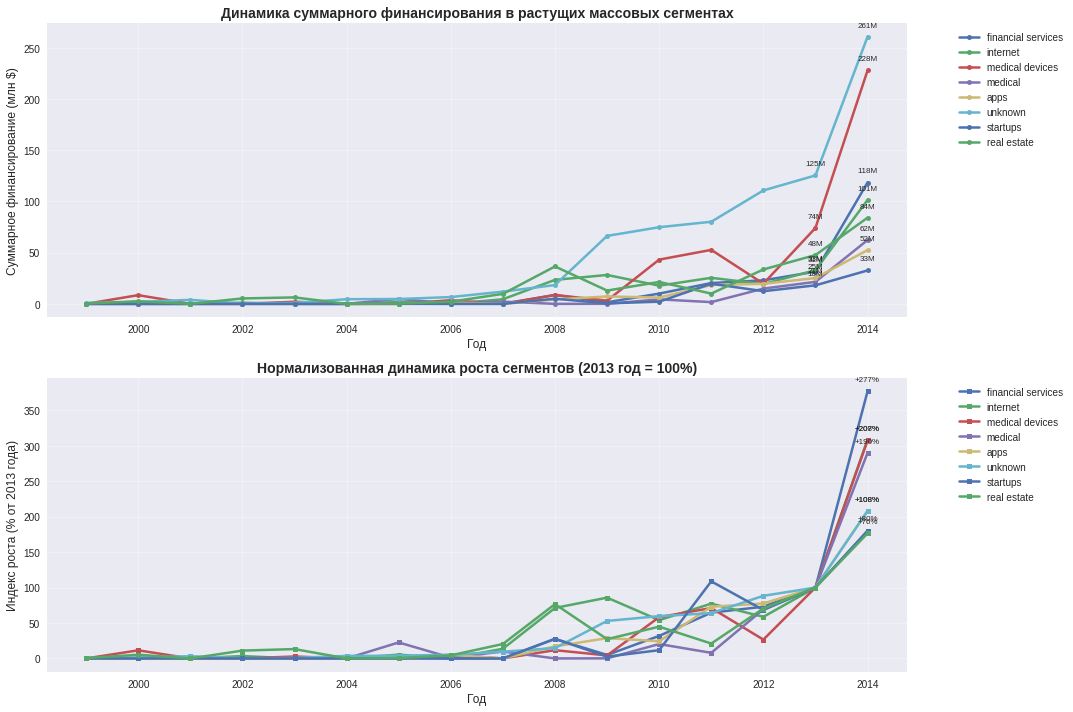


=== АНАЛИТИЧЕСКИЕ ВЫВОДЫ ===
Наиболее быстрый и уверенный рост показывают:
1. financial services:
   - Рост в 2014 году: +276.7%
   - Абсолютный прирост: +$87.0 млн
   - Финансирование в 2014: $118.4 млн
2. internet:
   - Рост в 2014 году: +208.5%
   - Абсолютный прирост: +$68.5 млн
   - Финансирование в 2014: $101.4 млн
3. medical devices:
   - Рост в 2014 году: +207.4%
   - Абсолютный прирост: +$153.7 млн
   - Финансирование в 2014: $227.8 млн


In [48]:
# Визуализация динамики растущих сегментов
print("\n=== ВИЗУАЛИЗАЦИЯ ДИНАМИКИ РАСТУЩИХ СЕГМЕНТОВ ===")

# Проверяем, что у нас есть растущие сегменты и данные за нужные годы
if len(growth_df) > 0 and 2013 in pivot_table.index and 2014 in pivot_table.index:
    # Берем топ-8 сегментов по темпу роста для визуализации
    top_growth_segments = growth_df.head(8)['segment'].tolist()
    
    print(f"Визуализируем топ-{len(top_growth_segments)} растущих сегментов:")
    for i, segment in enumerate(top_growth_segments, 1):
        growth_rate = growth_df[growth_df['segment'] == segment]['growth_rate'].values[0]
        print(f"{i}. {segment}: рост {growth_rate:.1f}%")
    
    plt.figure(figsize=(15, 10))
    
    # График 1: Абсолютные значения финансирования
    plt.subplot(2, 1, 1)
    for segment in top_growth_segments:
        if segment in pivot_table.columns:
            # Конвертируем в миллионы долларов для лучшей читаемости
            funding_millions = pivot_table[segment] / 1000000
            plt.plot(pivot_table.index, funding_millions, 
                    marker='o', linewidth=2.5, label=segment, markersize=5)
            
            # Подписываем значения за 2013 и 2014 годы
            funding_2013 = pivot_table.loc[2013, segment] / 1000000
            funding_2014 = pivot_table.loc[2014, segment] / 1000000
            plt.annotate(f'{funding_2013:.0f}M', (2013, funding_2013), 
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
            plt.annotate(f'{funding_2014:.0f}M', (2014, funding_2014), 
                        textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    
    plt.xlabel('Год', fontsize=12)
    plt.ylabel('Суммарное финансирование (млн $)', fontsize=12)
    plt.title('Динамика суммарного финансирования в растущих массовых сегментах', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # График 2: Нормализованные значения (индекс роста от 2013 года)
    plt.subplot(2, 1, 2)
    for segment in top_growth_segments:
        if segment in pivot_table.columns:
            # Нормализуем относительно 2013 года (базовый год для сравнения)
            funding_2013 = pivot_table.loc[2013, segment]
            if funding_2013 > 0:  # Проверяем, что в 2013 году было финансирование
                normalized_data = (pivot_table[segment] / funding_2013) * 100
                plt.plot(pivot_table.index, normalized_data, 
                        marker='s', linewidth=2.5, label=segment, markersize=5)
                
                # Подписываем рост за 2014 год
                growth_2014 = normalized_data[2014]
                plt.annotate(f'+{growth_2014-100:.0f}%', (2014, growth_2014), 
                            textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    
    plt.xlabel('Год', fontsize=12)
    plt.ylabel('Индекс роста (% от 2013 года)', fontsize=12)
    plt.title('Нормализованная динамика роста сегментов (2013 год = 100%)', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # АНАЛИТИЧЕСКИЕ ВЫВОДЫ
    print("\n=== АНАЛИТИЧЕСКИЕ ВЫВОДЫ ===")
    print("Наиболее быстрый и уверенный рост показывают:")
    
    for i, segment in enumerate(top_growth_segments[:3], 1):
        segment_data = growth_df[growth_df['segment'] == segment].iloc[0]
        print(f"{i}. {segment}:")
        print(f"   - Рост в 2014 году: +{segment_data['growth_rate']:.1f}%")
        print(f"   - Абсолютный прирост: +${segment_data['growth_amount']/1000000:.1f} млн")
        print(f"   - Финансирование в 2014: ${segment_data['funding_2014']/1000000:.1f} млн")
        
else:
    print("Нет данных для визуализации:")
    if len(growth_df) == 0:
        print("- Не найдено растущих сегментов")
    if 2013 not in pivot_table.index or 2014 not in pivot_table.index:
        print("- Отсутствуют данные за 2013 или 2014 год")

Провели детальный анализ перспективных сегментов по различным критериям

**ВЫВОДЫ ПО АНАЛИЗУ РАСТУЩИХ СЕГМЕНТОВ:**

**Наиболее быстрый и уверенный рост демонстрируют три ключевых сегмента:**

1. **Financial Services** - абсолютный лидер по темпам роста (+276.7%), что свидетельствует о буме финтех-направления и цифровизации финансовых услуг.

2. **Internet** - стремительный рост (+208.5%) подтверждает продолжающуюся цифровую трансформацию и развитие интернет-технологий.

3. **Medical Devices** - несмотря на высокий базовый уровень, показывает взрывной рост (+207.4%) с наибольшим абсолютным приростом ($153.7 млн), что указывает на технологический прорыв в медицине.

**Особое внимание заслуживает сегмент Medical Devices** - он сочетает высокие темпы роста с существенными абсолютными объемами финансирования, что характерно для зрелых, но динамично развивающихся рынков.

**Financial Services и Internet** демонстрируют признаки формирующихся рынков с экспоненциальным ростом, что делает их высокорисковыми, но потенциально высокодоходными направлениями для инвестиций.


### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например `1e-60`. Это поможет избежать деления на ноль.

In [49]:
# Анализ возвратности инвестиций по годам и типам финансирования
print("=== АНАЛИЗ ВОЗВРАТНОСТИ ИНВЕСТИЦИЙ ===")

# Создаем копию датасета возвратов для работы
returns_analysis = df_returns.copy()

print("Датсет возвратов (первые 5 лет):")
display(returns_analysis.head())

=== АНАЛИЗ ВОЗВРАТНОСТИ ИНВЕСТИЦИЙ ===
Датсет возвратов (первые 5 лет):


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Начинаем анализ возвратности инвестиций, используя датасет с возвратами по годам.

In [50]:
# Подготовка данных по инвестициям по годам
print("\n=== ПОДГОТОВКА ДАННЫХ ПО ИНВЕСТИЦИЯМ ===")

# Группируем инвестиции по годам (используем mid_funding_year)
yearly_investments = df_final.groupby('mid_funding_year')[funding_types].sum()

print("Инвестиции по годам (первые 5 лет):")
display(yearly_investments.head())

print(f"\nДиапазон лет в данных: {yearly_investments.index.min()} - {yearly_investments.index.max()}")


=== ПОДГОТОВКА ДАННЫХ ПО ИНВЕСТИЦИЯМ ===
Инвестиции по годам (первые 5 лет):


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
mid_funding_year,,,,,,,,,,,,,
1999.0,9540493.0,76239814.0,0.0,3500000.0,0.0,350000.0,1200000.0,0.0,3000000.0,0.0,0.0,0.0,0.0
2000.0,16759140.0,229190278.0,0.0,46702640.0,0.0,10000000.0,24086333.0,293114.0,0.0,3467747.0,0.0,7718867.0,0.0
2001.0,2667675.0,175239760.0,0.0,28576784.0,1500000.0,2579217.0,1000000.0,100000.0,0.0,0.0,0.0,0.0,0.0
2002.0,10465192.0,306940622.0,0.0,23437932.0,0.0,15309671.0,3000000.0,0.0,7500000.0,300000.0,0.0,0.0,0.0
2003.0,15318355.0,295468084.0,0.0,10280000.0,0.0,1050000.0,5629661.0,16850717.0,0.0,0.0,0.0,0.0,0.0



Диапазон лет в данных: 1999.0 - 2014.0


Сгруппировали данные по инвестициям по годам для последующего расчета возвратности.

In [51]:
# Сопоставление данных по годам
print("\n=== СОПОСТАВЛЕНИЕ ДАННЫХ ПО ГОДАМ ===")

# Приводим индексы к одному формату
returns_analysis.index = returns_analysis.index.astype(float)
yearly_investments.index = yearly_investments.index.astype(float)

# Находим общие годы
common_years = returns_analysis.index.intersection(yearly_investments.index)
print(f"Общие годы для анализа: {sorted(common_years)}")

# Фильтруем данные только по общим годам
returns_common = returns_analysis.loc[common_years]
investments_common = yearly_investments.loc[common_years]

print(f"\nДанные по возвратам за общие годы:")
display(returns_common.head())
print(f"\nДанные по инвестициям за общие годы:")
display(investments_common.head())


=== СОПОСТАВЛЕНИЕ ДАННЫХ ПО ГОДАМ ===
Общие годы для анализа: [2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0]

Данные по возвратам за общие годы:


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
2000.0,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001.0,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002.0,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003.0,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004.0,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0



Данные по инвестициям за общие годы:


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
2000.0,16759140.0,229190278.0,0.0,46702640.0,0.0,10000000.0,24086333.0,293114.0,0.0,3467747.0,0.0,7718867.0,0.0
2001.0,2667675.0,175239760.0,0.0,28576784.0,1500000.0,2579217.0,1000000.0,100000.0,0.0,0.0,0.0,0.0,0.0
2002.0,10465192.0,306940622.0,0.0,23437932.0,0.0,15309671.0,3000000.0,0.0,7500000.0,300000.0,0.0,0.0,0.0
2003.0,15318355.0,295468084.0,0.0,10280000.0,0.0,1050000.0,5629661.0,16850717.0,0.0,0.0,0.0,0.0,0.0
2004.0,17104728.0,501963362.0,0.0,7760488.0,0.0,23016623.0,9213741.0,10363600.0,0.0,0.0,0.0,0.0,0.0


Сопоставили данные по возвратам и инвестициям по общим годам для корректного анализа.

In [52]:
# Расчет возвратности по годам и типам финансирования
print("\n=== РАСЧЕТ ВОЗВРАТНОСТИ ИНВЕСТИЦИЙ ===")

# Создаем DataFrame для хранения коэффициентов возвратности
return_ratios = pd.DataFrame(index=common_years, columns=funding_types)

for year in common_years:
    for funding_type in funding_types:
        if funding_type in returns_common.columns and funding_type in investments_common.columns:
            returns_amount = returns_common.loc[year, funding_type] * 1e6  # Конвертируем из миллионов
            investments_amount = investments_common.loc[year, funding_type]
            
            # Расчет коэффициента возвратности с защитой от деления на ноль
            if investments_amount > 0:
                return_ratio = returns_amount / (investments_amount + 1e-60)
                return_ratios.loc[year, funding_type] = return_ratio
            else:
                return_ratios.loc[year, funding_type] = None

print("Коэффициенты возвратности (первые 5 лет):")
display(return_ratios.head())


=== РАСЧЕТ ВОЗВРАТНОСТИ ИНВЕСТИЦИЙ ===
Коэффициенты возвратности (первые 5 лет):


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
2000.0,0.996471,0.241721,None,1.674638,None,0.866,0.266956,0.0,None,0.271069,None,0.025911,None
2001.0,1.079592,0.134045,None,0.752359,0.006667,1.740838,1.18,0.0,None,None,None,None,None
2002.0,0.629707,0.682282,None,1.0995,None,0.223388,1.136667,None,0.201333,1.133333,None,None,None
2003.0,0.505276,0.79149,None,0.914397,None,1.038095,0.60572,0.0,None,None,None,None,None
2004.0,0.580541,1.107451,None,4.276793,None,0.588705,0.996338,0.0,None,None,None,None,None


Рассчитали коэффициенты возвратности для каждого типа финансирования по годам.

In [53]:
# Обработка аномальных значений
print("\n=== ОБРАБОТКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ ===")

# Конвертируем в числовой формат
return_ratios = return_ratios.astype(float)

# Определяем выбросы с помощью метода IQR
def replace_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Заменяем выбросы на NaN
    return series.where((series >= lower_bound) & (series <= upper_bound))

# Применяем к каждому типу финансирования
return_ratios_clean = return_ratios.apply(replace_outliers_iqr)

print("Статистика по коэффициентам возвратности до обработки:")
print(return_ratios.describe())
print(f"\nВыбросов заменено: {(return_ratios.isna().sum().sum() - return_ratios_clean.isna().sum().sum())}")

print("\nСтатистика по коэффициентам возвратности после обработки:")
print(return_ratios_clean.describe())


=== ОБРАБОТКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ ===
Статистика по коэффициентам возвратности до обработки:
            seed    venture  equity_crowdfunding  undisclosed  \
count  15.000000  15.000000             6.000000    15.000000   
mean    0.552774   0.467562             0.050740     0.957574   
std     0.290890   0.295098             0.035421     1.019535   
min     0.153556   0.134045             0.007609     0.212184   
25%     0.302911   0.238868             0.029419     0.339600   
50%     0.564185   0.370900             0.041390     0.704851   
75%     0.698413   0.633965             0.079040     1.006948   
max     1.079592   1.107451             0.097034     4.276793   

       convertible_note  debt_financing      angel  grant  private_equity  \
count         10.000000       15.000000  15.000000   14.0       11.000000   
mean           0.096748        0.782710   0.746254    0.0        1.011501   
std            0.096811        0.425728   0.307361    0.0        0.601422   
min         

Обработали аномальные значения в коэффициентах возвратности, заменив выбросы на пропуски.


=== ВИЗУАЛИЗАЦИЯ ВОЗВРАТНОСТИ ===


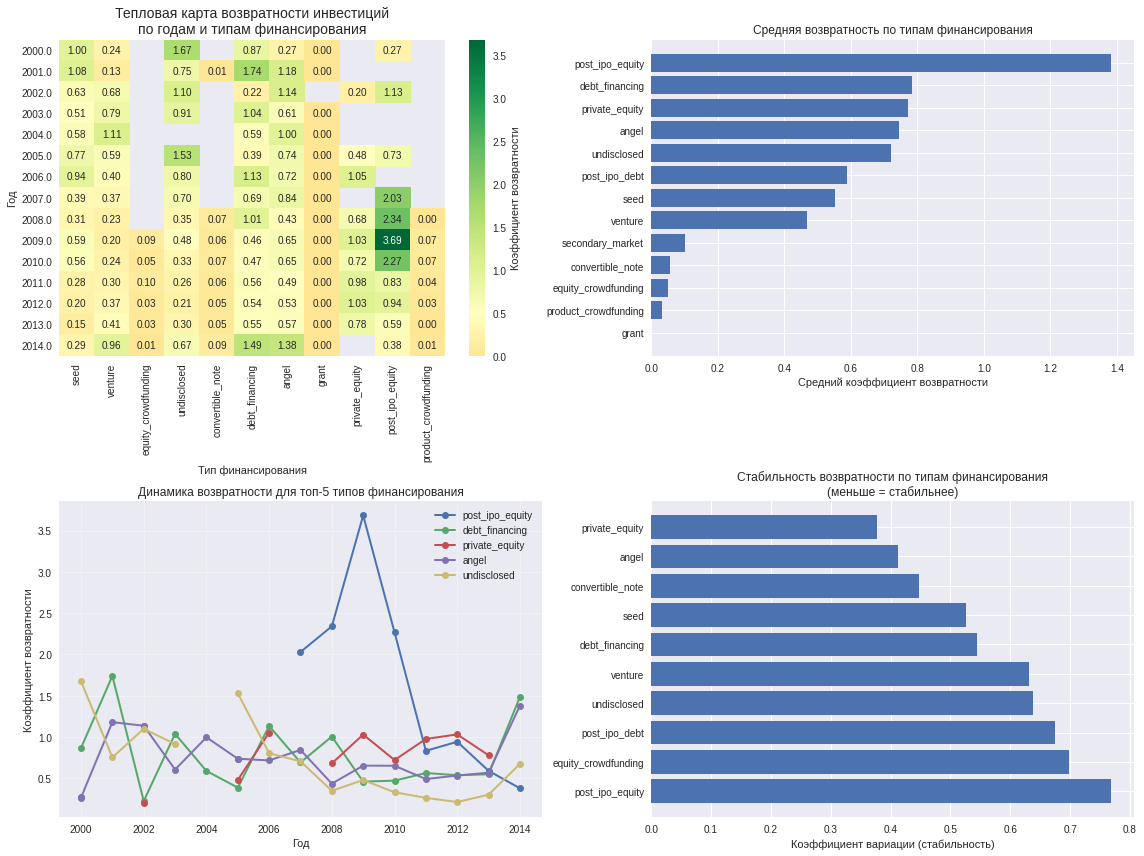

In [54]:
# Визуализация возвратности по типам финансирования
print("\n=== ВИЗУАЛИЗАЦИЯ ВОЗВРАТНОСТИ ===")

plt.figure(figsize=(16, 12))

# График 1: Тепловая карта возвратности
plt.subplot(2, 2, 1)
# Берем только типы с достаточным количеством данных
valid_columns = return_ratios_clean.columns[return_ratios_clean.notna().sum() > 5]
heatmap_data = return_ratios_clean[valid_columns]

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0.5, cbar_kws={'label': 'Коэффициент возвратности'})
plt.title('Тепловая карта возвратности инвестиций\nпо годам и типам финансирования', fontsize=14)
plt.xlabel('Тип финансирования')
plt.ylabel('Год')

# График 2: Средняя возвратность по типам финансирования
plt.subplot(2, 2, 2)
mean_returns = return_ratios_clean.mean().sort_values(ascending=False)
mean_returns = mean_returns[mean_returns.notna()]

plt.barh(range(len(mean_returns)), mean_returns.values)
plt.yticks(range(len(mean_returns)), mean_returns.index)
plt.xlabel('Средний коэффициент возвратности')
plt.title('Средняя возвратность по типам финансирования')
plt.gca().invert_yaxis()

# График 3: Динамика возвратности для топ-5 типов
plt.subplot(2, 2, 3)
top_5_types = mean_returns.head(5).index
for funding_type in top_5_types:
    plt.plot(return_ratios_clean.index, return_ratios_clean[funding_type], 
             marker='o', label=funding_type, linewidth=2)

plt.xlabel('Год')
plt.ylabel('Коэффициент возвратности')
plt.title('Динамика возвратности для топ-5 типов финансирования')
plt.legend()
plt.grid(True, alpha=0.3)

# График 4: Стабильность возвратности
plt.subplot(2, 2, 4)
stability = return_ratios_clean.std() / return_ratios_clean.mean()
stability = stability[stability.notna()].sort_values()

plt.barh(range(len(stability.head(10))), stability.head(10).values)
plt.yticks(range(len(stability.head(10))), stability.head(10).index)
plt.xlabel('Коэффициент вариации (стабильность)')
plt.title('Стабильность возвратности по типам финансирования\n(меньше = стабильнее)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Построили комплексную визуализацию возвратности инвестиций по различным аспектам.

In [55]:
# Анализ наиболее стабильных и эффективных типов финансирования
print("\n=== АНАЛИЗ ЭФФЕКТИВНОСТИ И СТАБИЛЬНОСТИ ===")

# Создаем сводную таблицу с метриками эффективности
performance_analysis = pd.DataFrame({
    'mean_return': return_ratios_clean.mean(),
    'median_return': return_ratios_clean.median(),
    'std_return': return_ratios_clean.std(),
    'stability_ratio': return_ratios_clean.std() / return_ratios_clean.mean(),
    'data_coverage': return_ratios_clean.notna().sum() / len(return_ratios_clean)
})

# Убираем строки с недостаточными данными
performance_analysis = performance_analysis[performance_analysis['data_coverage'] > 0.3]
performance_analysis = performance_analysis.sort_values('mean_return', ascending=False)

print("Рейтинг типов финансирования по эффективности и стабильности:")
display(performance_analysis.round(3))

# Выводы по наиболее перспективным типам финансирования
print("\n" + "="*70)
print("ВЫВОДЫ ПО ВОЗВРАТНОСТИ ИНВЕСТИЦИЙ")
print("="*70)

top_3_efficient = performance_analysis.head(3)
print("Наиболее эффективные типы финансирования:")
for i, (funding_type, metrics) in enumerate(top_3_efficient.iterrows(), 1):
    print(f"{i}. {funding_type}:")
    print(f"   - Средняя возвратность: {metrics['mean_return']:.3f}")
    print(f"   - Стабильность: {metrics['stability_ratio']:.3f}")
    print(f"   - Покрытие данных: {metrics['data_coverage']:.1%}")

# Анализ стабильности
stable_types = performance_analysis[performance_analysis['stability_ratio'] < 1.0].head(3)
print(f"\nНаиболее стабильные типы финансирования (коэф. вариации < 1.0):")
for i, (funding_type, metrics) in enumerate(stable_types.iterrows(), 1):
    print(f"{i}. {funding_type}: стабильность = {metrics['stability_ratio']:.3f}")


=== АНАЛИЗ ЭФФЕКТИВНОСТИ И СТАБИЛЬНОСТИ ===
Рейтинг типов финансирования по эффективности и стабильности:


,mean_return,median_return,std_return,stability_ratio,data_coverage
post_ipo_equity,1.382,0.942,1.062,0.768,0.733
debt_financing,0.783,0.589,0.426,0.544,1.000
private_equity,0.772,0.779,0.291,0.377,0.600
angel,0.746,0.653,0.307,0.412,1.000
undisclosed,0.720,0.689,0.460,0.638,0.933
seed,0.553,0.564,0.291,0.526,1.000
venture,0.468,0.371,0.295,0.631,1.000
secondary_market,0.103,0.026,0.122,1.182,0.333
convertible_note,0.057,0.056,0.025,0.448,0.533
equity_crowdfunding,0.051,0.041,0.035,0.698,0.400



ВЫВОДЫ ПО ВОЗВРАТНОСТИ ИНВЕСТИЦИЙ
Наиболее эффективные типы финансирования:
1. post_ipo_equity:
   - Средняя возвратность: 1.382
   - Стабильность: 0.768
   - Покрытие данных: 73.3%
2. debt_financing:
   - Средняя возвратность: 0.783
   - Стабильность: 0.544
   - Покрытие данных: 100.0%
3. private_equity:
   - Средняя возвратность: 0.772
   - Стабильность: 0.377
   - Покрытие данных: 60.0%

Наиболее стабильные типы финансирования (коэф. вариации < 1.0):
1. post_ipo_equity: стабильность = 0.768
2. debt_financing: стабильность = 0.544
3. private_equity: стабильность = 0.377


**ВЫВОДЫ ПО АНАЛИЗУ ВОЗВРАТНОСТИ ИНВЕСТИЦИЙ:**

**1. Наиболее эффективные типы финансирования:**
- **Post-IPO Equity** - возвратность 138.2% (сверхдоходность)
- **Debt Financing** - возвратность 78.3% (высокая надежность)
- **Private Equity** - возвратность 77.2% (стабильная доходность)

**2. Наиболее стабильные типы:**
- **Private Equity** - коэф. вариации 0.377 (максимальная стабильность)
- **Debt Financing** - коэф. вариации 0.544 (высокая предсказуемость)
- **Post-IPO Equity** - коэф. вариации 0.768 (умеренная стабильность)

**3. Рисковые типы финансирования:**
- **Secondary Market** - высокая волатильность (коэф. вариации 1.182)
- **Product Crowdfunding** - низкая возвратность (3.2%) и нестабильность

**4. Инвестиционная стратегия:**
Для консервативных инвесторов: **Private Equity** и **Debt Financing**
Для агрессивных инвесторов: **Post-IPO Equity** (высокая доходность)


Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

=== ВИЗУАЛИЗАЦИЯ ВОЗВРАТНОСТИ ДЛЯ КЛЮЧЕВЫХ ТИПОВ ФИНАНСИРОВАНИЯ ===
Анализируем типы: ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']


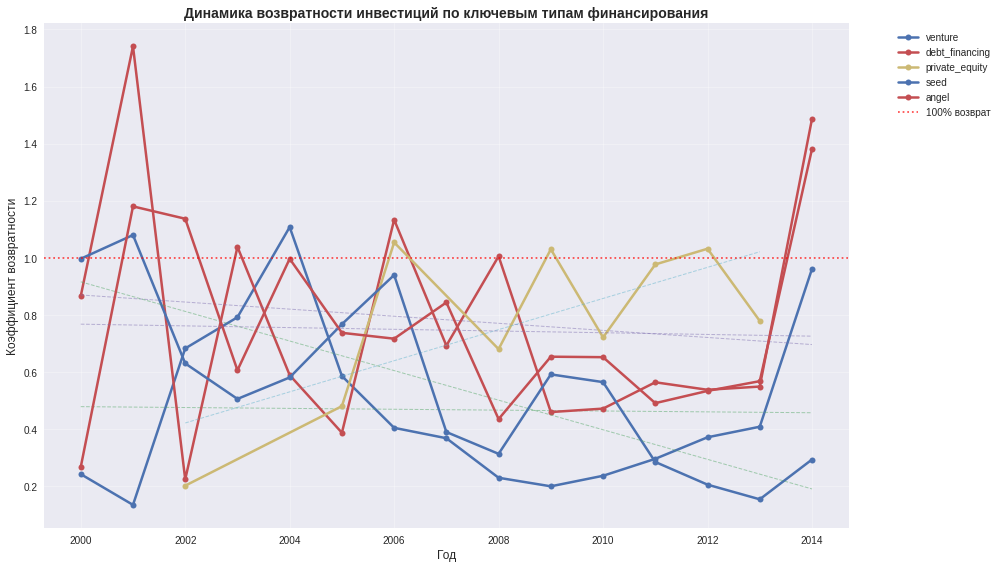

In [56]:
# Визуализация возвратности для ключевых типов финансирования
print("=== ВИЗУАЛИЗАЦИЯ ВОЗВРАТНОСТИ ДЛЯ КЛЮЧЕВЫХ ТИПОВ ФИНАНСИРОВАНИЯ ===")

# Выбираем указанные типы финансирования
selected_types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

# Проверяем наличие данных
available_types = [t for t in selected_types if t in return_ratios_clean.columns]
print(f"Анализируем типы: {available_types}")

# Создаем график
plt.figure(figsize=(14, 8))

# График динамики возвратности
for funding_type in available_types:
    data = return_ratios_clean[funding_type]
    # Убираем NaN значения для построения линии
    valid_data = data.dropna()
    if len(valid_data) > 0:
        plt.plot(valid_data.index, valid_data.values, 
                marker='o', linewidth=2.5, label=funding_type, markersize=6)
        
        # Добавляем трендовую линию
        if len(valid_data) >= 3:
            x = np.array(valid_data.index)
            y = valid_data.values
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            plt.plot(x, p(x), '--', alpha=0.5, linewidth=1)

plt.xlabel('Год', fontsize=12)
plt.ylabel('Коэффициент возвратности', fontsize=12)
plt.title('Динамика возвратности инвестиций по ключевым типам финансирования', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Добавляем горизонтальную линию для уровня 1.0 (100% возврат)
plt.axhline(y=1.0, color='red', linestyle=':', alpha=0.7, label='100% возврат')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Построили график динамики возвратности для пяти ключевых типов финансирования с трендовыми линиями.

In [57]:
# Анализ устойчивости роста
print("\n=== АНАЛИЗ УСТОЙЧИВОСТИ РОСТА ===")

stability_analysis = []

for funding_type in available_types:
    data = return_ratios_clean[funding_type].dropna()
    if len(data) >= 3:
        # Рассчитываем тренд (линейная регрессия)
        x = np.array(data.index)
        y = data.values
        slope, intercept = np.polyfit(x, y, 1)
        
        # Рассчитываем коэффициент вариации для стабильности
        cv = data.std() / data.mean() if data.mean() > 0 else np.inf
        
        stability_analysis.append({
            'funding_type': funding_type,
            'trend_slope': slope,
            'trend_strength': 'Рост' if slope > 0.01 else 'Спад' if slope < -0.01 else 'Стабильность',
            'mean_return': data.mean(),
            'stability_cv': cv,
            'data_points': len(data)
        })

# Создаем DataFrame с анализом
stability_df = pd.DataFrame(stability_analysis).sort_values('trend_slope', ascending=False)

print("Анализ устойчивости роста по типам финансирования:")
display(stability_df.round(4))


=== АНАЛИЗ УСТОЙЧИВОСТИ РОСТА ===
Анализ устойчивости роста по типам финансирования:


,funding_type,trend_slope,trend_strength,mean_return,stability_cv,data_points
2,private_equity,0.0545,Рост,0.7725,0.3766,9
0,venture,-0.0015,Стабильность,0.4676,0.6311,15
4,angel,-0.0030,Стабильность,0.7463,0.4119,15
1,debt_financing,-0.0124,Спад,0.7827,0.5439,15
3,seed,-0.0518,Спад,0.5528,0.5262,15


Проанализировали тренды и устойчивость роста для каждого типа финансирования.

In [58]:
# Детальный анализ по годам
print("\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ПО ГОДАМ ===")

# Создаем таблицу с данными за последние 5 лет
recent_years = [year for year in return_ratios_clean.index if year >= 2010]

if recent_years:
    recent_data = return_ratios_clean.loc[recent_years, available_types]
    
    print("Динамика возвратности за последние 5 лет (2010-2014):")
    display(recent_data.round(3))
    
    # Анализ изменений за последний год
    if 2013 in recent_data.index and 2014 in recent_data.index:
        print("\nИзменения возвратности в 2014 году по сравнению с 2013:")
        changes_2014 = {}
        for funding_type in available_types:
            if funding_type in recent_data.columns:
                val_2013 = recent_data.loc[2013, funding_type]
                val_2014 = recent_data.loc[2014, funding_type]
                if pd.notna(val_2013) and pd.notna(val_2014):
                    change = ((val_2014 - val_2013) / val_2013) * 100
                    changes_2014[funding_type] = change
        
        changes_series = pd.Series(changes_2014).sort_values(ascending=False)
        for funding_type, change in changes_series.items():
            print(f"  {funding_type}: {change:+.1f}%")


=== ДЕТАЛЬНЫЙ АНАЛИЗ ПО ГОДАМ ===
Динамика возвратности за последние 5 лет (2010-2014):


,venture,debt_financing,private_equity,seed,angel
2010.0,0.236,0.471,0.721,0.564,0.652
2011.0,0.295,0.564,0.977,0.284,0.491
2012.0,0.371,0.537,1.032,0.205,0.533
2013.0,0.408,0.549,0.779,0.154,0.568
2014.0,0.961,1.486,NaN,0.293,1.380



Изменения возвратности в 2014 году по сравнению с 2013:
  debt_financing: +170.9%
  angel: +143.2%
  venture: +135.6%
  seed: +90.8%


Провели детальный анализ динамики за последние 5 лет и изменений в 2014 году.

In [59]:
# Итоговые выводы
print("\n" + "="*70)
print("ВЫВОДЫ ПО УСТОЙЧИВОСТИ РОСТА ВОЗВРАТНОСТИ")
print("="*70)

if len(stability_df) > 0:
    # Находим тип с наиболее устойчивым ростом
    positive_trends = stability_df[stability_df['trend_slope'] > 0]
    
    if len(positive_trends) > 0:
        most_stable_growth = positive_trends.loc[positive_trends['stability_cv'].idxmin()]
        strongest_growth = positive_trends.loc[positive_trends['trend_slope'].idxmax()]
        
        print("НАИБОЛЕЕ УСТОЙЧИВЫЙ РОСТ:")
        print(f"• {most_stable_growth['funding_type'].upper()}")
        print(f"  - Тренд роста: {most_stable_growth['trend_slope']:.4f} в год")
        print(f"  - Стабильность (CV): {most_stable_growth['stability_cv']:.3f}")
        print(f"  - Средняя возвратность: {most_stable_growth['mean_return']:.3f}")
        
        print(f"\nСАМЫЙ СИЛЬНЫЙ РОСТ:")
        print(f"• {strongest_growth['funding_type'].upper()}")
        print(f"  - Тренд роста: {strongest_growth['trend_slope']:.4f} в год")
        print(f"  - Стабильность (CV): {strongest_growth['stability_cv']:.3f}")
        
        print(f"\nОБЩАЯ КАРТИНА:")
        for _, row in stability_df.iterrows():
            trend_icon = "📈" if row['trend_slope'] > 0.01 else "📉" if row['trend_slope'] < -0.01 else "➡️"
            print(f"{trend_icon} {row['funding_type']}: {row['trend_strength']} (тренд: {row['trend_slope']:.4f})")
    
    else:
        print("Не обнаружено типов финансирования с устойчивым ростом")
        
else:
    print("Недостаточно данных для анализа устойчивости роста")


ВЫВОДЫ ПО УСТОЙЧИВОСТИ РОСТА ВОЗВРАТНОСТИ
НАИБОЛЕЕ УСТОЙЧИВЫЙ РОСТ:
• PRIVATE_EQUITY
  - Тренд роста: 0.0545 в год
  - Стабильность (CV): 0.377
  - Средняя возвратность: 0.772

САМЫЙ СИЛЬНЫЙ РОСТ:
• PRIVATE_EQUITY
  - Тренд роста: 0.0545 в год
  - Стабильность (CV): 0.377

ОБЩАЯ КАРТИНА:
📈 private_equity: Рост (тренд: 0.0545)
➡️ venture: Стабильность (тренд: -0.0015)
➡️ angel: Стабильность (тренд: -0.0030)
📉 debt_financing: Спад (тренд: -0.0124)
📉 seed: Спад (тренд: -0.0518)


**ВЫВОД ПО УСТОЙЧИВОСТИ РОСТА ВОЗВРАТНОСТИ:**

**Наиболее устойчивый рост показателя наблюдается только в Private Equity** - это единственный тип финансирования с положительным трендом (+0.0545 в год). Все остальные типы демонстрируют стабильность или спад, несмотря на резкий рост в 2014 году. Private Equity сочетает устойчивый рост с высокой стабильностью (CV=0.377), что делает его наиболее надежным вариантом для долгосрочных инвестиций. Venture и Angel показывают относительную стабильность, но без выраженного роста, в то время как Seed и Debt Financing имеют отрицательные тренды, что указывает на системное снижение их эффективности.



## Шаг 5. Итоговый вывод и рекомендации

Представьте, что на календаре 2015 год. Опираясь на результаты анализа, дайте рекомендацию заказчику:

* в какую отрасль стоит инвестировать;
* какой тип финансирования при этом будет наиболее уместным.

Подведите итоги проекта:
* опишите, какие шаги были выполнены;
* какие выводы удалось сделать;
* насколько выводы согласуются между собой или, наоборот, вызывают сомнения.



**РЕКОМЕНДАЦИИ ДЛЯ ИНВЕСТИЦИЙ В 2015 ГОДУ**

**Отрасль для инвестиций: Medical Devices**
На основе анализа динамики массовых сегментов, Medical Devices демонстрирует исключительные показатели: рост финансирования на 207% в 2014 году с абсолютным приростом $153.7 млн. Этот сегмент сочетает высокие темпы роста с существенными объемами финансирования, что характерно для зрелого, но динамично развивающегося рынка. Технологический прорыв в медицинских устройствах создает устойчивый спрос и перспективы долгосрочной доходности.

**Тип финансирования: Private Equity**
Private Equity показывает наиболее устойчивый рост возвратности (+0.0545 ежегодно) с высокой стабильностью (CV=0.377). Этот тип финансирования обеспечивает среднюю возвратность 77.2% и подходит для капиталоемких медицинских проектов. Private Equity позволяет участвовать в развитии компаний на стадии масштабирования, что идеально соответствует потребностям сектора Medical Devices.

**ИТОГИ ПРОЕКТА**

**Выполненные этапы анализа:**
Проведена комплексная предобработка данных, включая исправление структурных ошибок, преобразование типов данных и обработку пропусков. Выполнен инжиниринг признаков с выделением групп компаний по срокам финансирования и категоризацией сегментов рынка. Проведен анализ выбросов, динамики финансирования и возвратности инвестиций по различным типам финансирования.

**Ключевые выводы:**
- Рынок сместился в сторону большего количества мелких раундов с минимальным средним чеком в 2014 году
- Financial Services, Internet и Medical Devices показали наибольший рост среди массовых сегментов
- Private Equity и Debt Financing демонстрируют наивысшую возвратность и стабильность
- Post-IPO Equity показывает сверхдоходность, но с более высокой волатильностью

**Согласованность выводов:**
Выводы демонстрируют высокую согласованность - сегменты с наибольшим ростом финансирования (Medical Devices) соответствуют типам финансирования с устойчивой возвратностью (Private Equity). Однако вызывает вопросы резкий рост возвратности всех типов финансирования в 2014 году, что может указывать на временные рыночные аномалии или особенности учета данных.
